# Importing Desired Libraries and Reading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file1 = pd.read_csv('RICE.csv')

In [114]:
file1.head()

,observation_year,standard_week,pest_value,collection_type,maxt,mint,rh1(%),rh2(%),rf(mm),ws(kmph),ssh(hrs),evp(mm),pest_name,location
0,2003,1,0.0,Number/hill,27.9,14.8,94.7,51.3,0.0,3.1,8.7,2.7,Brownplanthopper,Cuttack
1,2003,2,0.0,Number/hill,27.2,15.0,93.9,53.1,0.0,2.1,8.7,2.4,Brownplanthopper,Cuttack
2,2003,3,0.0,Number/hill,28.7,18.3,94.1,56.7,0.6,4.8,6.7,2.8,Brownplanthopper,Cuttack
3,2003,4,0.0,Number/hill,25.3,16.4,90.9,57.4,0.3,6.5,5.3,3.0,Brownplanthopper,Cuttack
4,2003,5,0.0,Number/hill,28.8,18.7,95.7,55.0,0.0,5.2,6.3,2.8,Brownplanthopper,Cuttack


In [4]:
file2 = pd.read_csv('ICRISAT-District Level Data.csv')

In [5]:
#file2.head()

# Standardizing Column Names 

In [6]:
# connecting the names and converting them to lower case
file1.columns = [e.lower().replace(' ', '_') for e in file1.columns] 

In [7]:
#file1.head()

In [8]:
# connecting the names and converting them to lower case
file2.columns = [e.lower().replace(' ', '_') for e in file2.columns]

In [9]:
#file2.head()

# Extracting Columns from Data Two and Merging With Data One 

In [10]:
# data extraction from file2
file2_extract = file2[['year', 'dist_name', 'rice_area_(1000_ha)', 'rice_production_(1000_tons)', 'rice_yield_(kg_per_ha)']]
#file2_extract

In [11]:
# renaming some columns to align with name in file1 for easy merging
file2_extract  = file2_extract .rename(columns = {'dist_name': 'location', 'year': 'observation_year' })
#file2_extract.head() 

In [12]:
# grouping and aggregating columns in file1 for onward merging with file2 for further analysis
grouped_1 = file1.groupby(['observation_year', 'pest_name', 'location']).agg({'pest_value': np.mean,'maxt': np.mean, 'mint': np.mean, 'rh1(%)': np.mean, 'rh2(%)': np.mean, 'rf(mm)': np.mean, 'ws(kmph)': np.mean, 'ssh(hrs)': np.mean, 'evp(mm)': np.mean})
#grouped_1

In [126]:
# merged data in order to obtain yield data which is missing in file1
merged_data = pd.merge(left = grouped_1, right = file2_extract, on = ['observation_year', 'location'], how = 'inner')
merged_data.head()

,observation_year,location,pest_value,maxt,mint,rh1(%),rh2(%),rf(mm),ws(kmph),ssh(hrs),evp(mm),rice_area_(1000_ha),rice_production_(1000_tons),rice_yield_(kg_per_ha)
0,1995,Raipur,102.615385,33.440385,19.844231,77.734615,46.436538,13.944231,6.300000,6.896154,5.921154,908.40,1314.90,1447.49
1,1995,Raipur,159.557692,33.440385,19.844231,77.734615,46.436538,13.944231,6.300000,6.896154,5.921154,908.40,1314.90,1447.49
2,1995,Cuttack,6.192308,31.690385,21.546154,90.638462,56.525000,29.148077,4.834615,7.228846,4.309615,572.11,811.68,1418.75
3,1995,Ludhiana,4.663462,29.417308,16.576923,82.298077,45.909615,23.830769,4.317308,8.790385,4.515385,242.00,782.75,3234.50
4,1996,Raipur,10.153846,33.159615,19.659615,77.067308,42.326923,20.178846,4.546154,7.357692,5.950000,860.40,1448.80,1683.87


In [125]:
merged_data.to_csv('merged.csv', index = False)

# Data Cleaning, Checking and Filling NaNs File1

In [14]:
#file1.dtypes

In [15]:
#merged_data.dtypes

In [16]:
#file1.isna().sum()

In [17]:
#file2_extract.isna().sum()

In [18]:
file1['pest_name'].unique()

array(['Brownplanthopper', 'Gallmidge', 'Greenleafhopper', 'LeafFolder',
       'Yellowstemborer', 'Caseworm', 'Miridbug',
       'Whitebackedplanthopper', 'ZigZagleafhopper', 'LeafBlast',
       'NeckBlast'], dtype=object)

In [19]:
file1['collection_type'].unique()

array(['Number/hill', 'Number/Light trap', 'Percent Damage',
       'Number/Pheromone trap', 'Percentage'], dtype=object)

In [20]:
file1['location'].unique()

array(['Cuttack', 'Ludhiana', 'Maruteru', 'Palampur', 'Raipur',
       'Rajendranagar'], dtype=object)

In [21]:
merged_data['location'].unique()

array(['Raipur', 'Cuttack', 'Ludhiana'], dtype=object)

# Exploratory Data Analysis for File1

In [22]:
target_y = file1['pest_value']
#target_y

In [23]:
categorical = file1.select_dtypes(include = object)     # extracting categorical data
cat_extra = file1[['observation_year', 'standard_week']]
categorical = pd.concat([categorical, cat_extra], axis = 1)
#categorical.dtypes

In [24]:
categorical['observation_year'] = categorical['observation_year'].astype(str)
categorical['standard_week'] = categorical['standard_week'].astype(str)
#categorical.dtypes

In [25]:
numerical = file1.select_dtypes(np.number) # extracting numerical data from the main data for analyses
num_drop = numerical[['observation_year', 'standard_week', 'pest_value']]
numerical = numerical.drop(columns = num_drop)
#numerical.head()

In [26]:
numerical.describe().T # transposing the data for further analyses especially with respect to correlation


,count,mean,std,min,25%,50%,75%,max
maxt,19404.0,31.169006,4.904610,10.9,28.8,30.9,33.425,71.6
mint,19404.0,20.404540,5.388381,0.8,17.5,22.0,24.400,30.9
rh1(%),19404.0,82.190981,13.846883,9.3,79.1,87.3,91.000,100.0
rh2(%),19404.0,53.725763,18.948801,6.7,38.0,56.6,69.000,95.1
rf(mm),19404.0,19.414152,39.160009,0.0,0.0,0.0,21.400,444.4
ws(kmph),19404.0,4.501268,3.194973,0.0,2.3,3.7,5.900,27.6
ssh(hrs),19404.0,6.858529,4.176542,0.0,4.9,7.3,8.900,127.1
evp(mm),19404.0,5.877180,6.536221,0.0,2.9,4.0,6.000,68.3


In [27]:
correlations_matrix = pd.concat([numerical, target_y], axis = 1).corr()     # correlation matrix to see pairs that influence each other
correlations_matrix

,maxt,mint,rh1(%),rh2(%),rf(mm),ws(kmph),ssh(hrs),evp(mm),pest_value
maxt,1.000000,0.657952,-0.270353,-0.318608,-0.102012,0.126780,0.160298,0.223654,0.010841
mint,0.657952,1.000000,0.051965,0.323908,0.221505,0.273330,-0.134484,0.173550,0.052029
rh1(%),-0.270353,0.051965,1.000000,0.621996,0.155136,-0.234460,-0.211710,-0.095929,0.066901
rh2(%),-0.318608,0.323908,0.621996,1.000000,0.401561,0.032512,-0.380794,-0.020470,0.082626
rf(mm),-0.102012,0.221505,0.155136,0.401561,1.000000,0.100092,-0.273260,0.005753,-0.015998
ws(kmph),0.126780,0.273330,-0.234460,0.032512,0.100092,1.000000,-0.114133,0.076622,-0.047848
ssh(hrs),0.160298,-0.134484,-0.211710,-0.380794,-0.273260,-0.114133,1.000000,0.041709,-0.012022
evp(mm),0.223654,0.173550,-0.095929,-0.020470,0.005753,0.076622,0.041709,1.000000,0.026391
pest_value,0.010841,0.052029,0.066901,0.082626,-0.015998,-0.047848,-0.012022,0.026391,1.000000


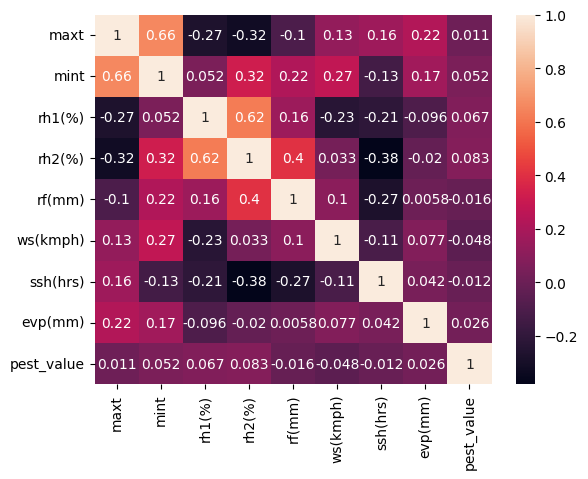

In [28]:
sns.heatmap(correlations_matrix, annot=True) # heat map using colours to show level of correlation; how the various colimns are related to each other 
plt.show()

In [29]:
#print(numerical.isna().any())

In [30]:
nonzero_counts = (numerical != 0).sum()
#print(nonzero_counts)

# Plots for Numerical Data File1

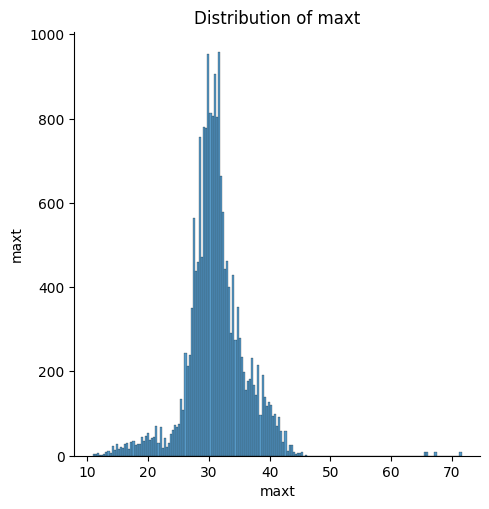

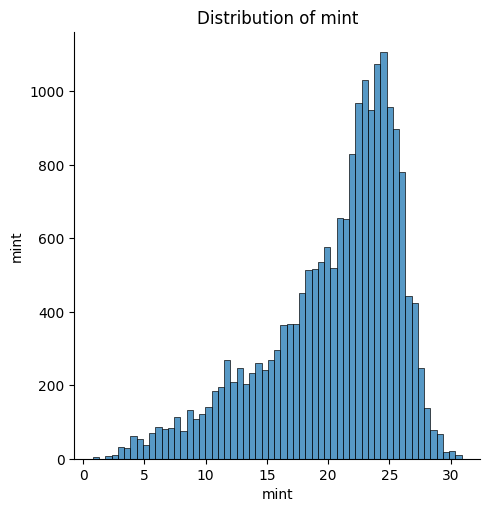

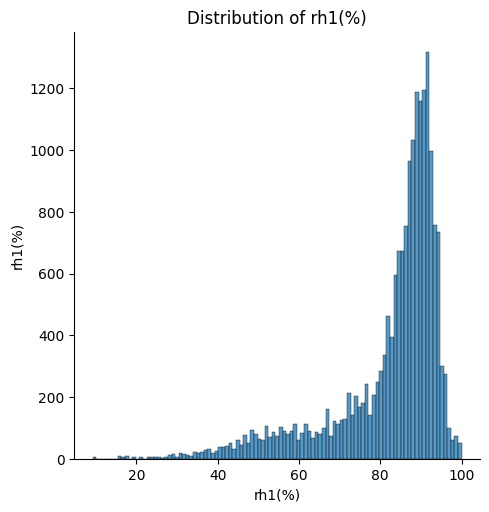

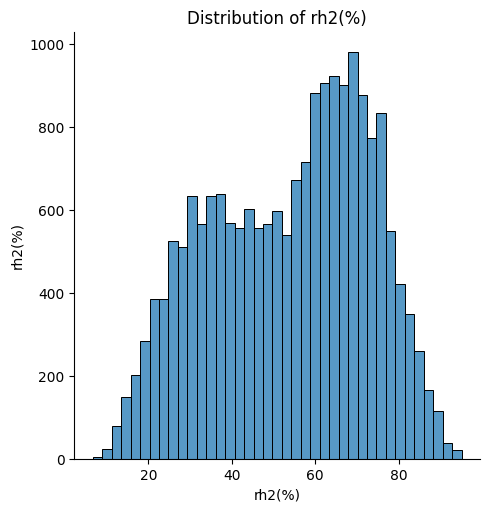

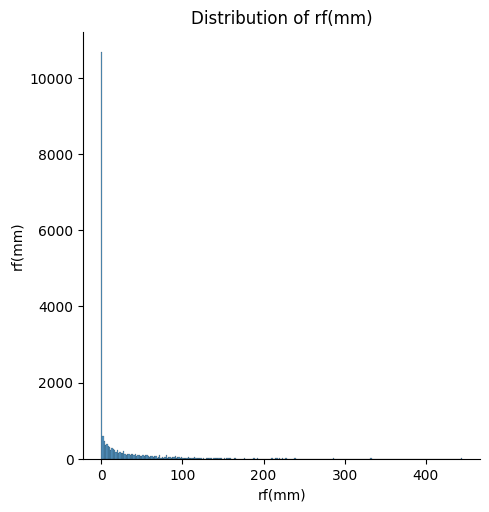

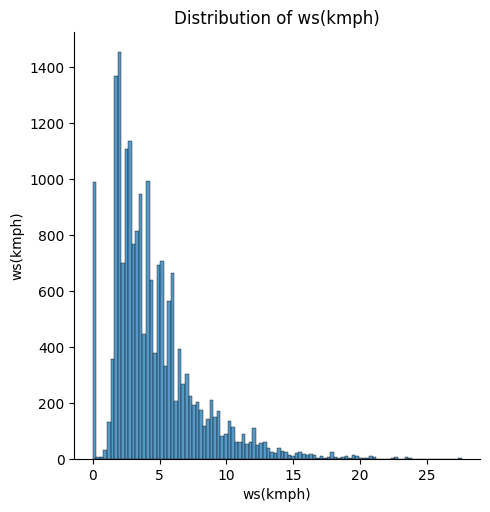

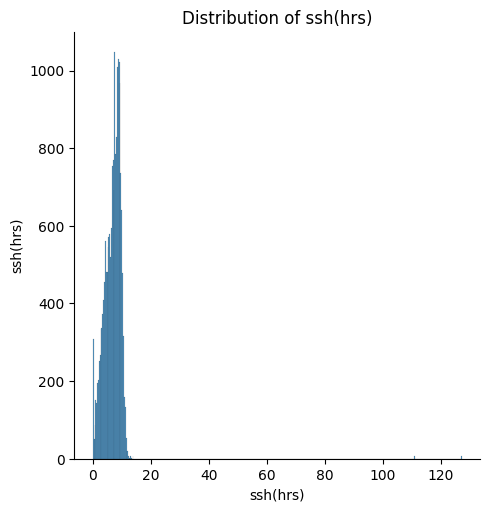

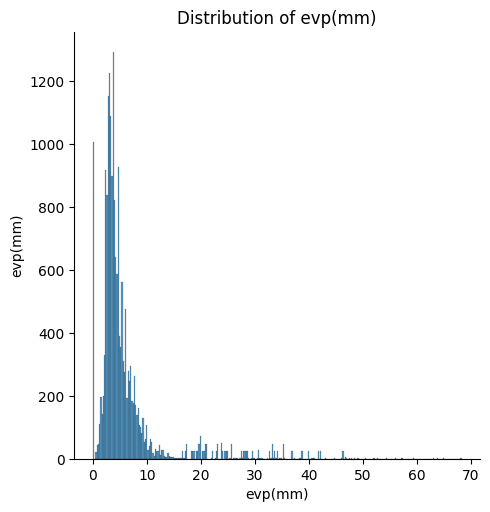

In [31]:
def chartPlots(numerical):                         # distribution plots for the numerical data
    for column in numerical.columns:
        sns.displot(numerical[column])
        plt.xlabel(column)
        plt.ylabel(column)
        plt.title(f'Distribution of {column}')
        plt.show()
        
df = pd.DataFrame(numerical)
chartPlots(df)

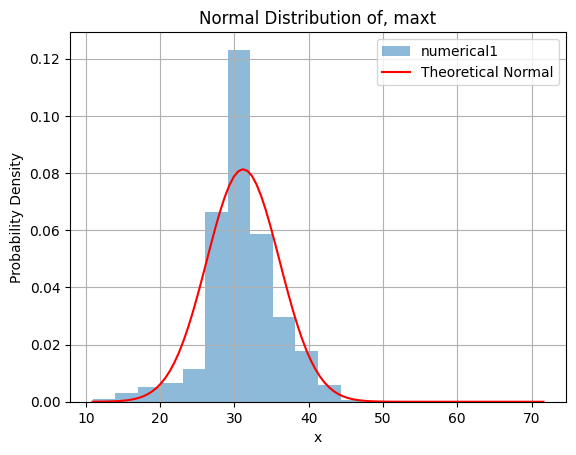

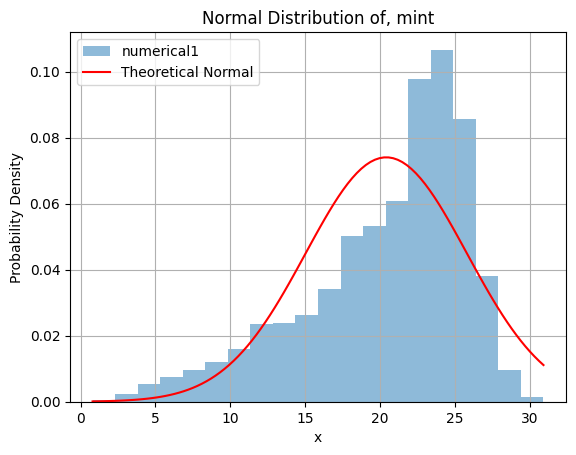

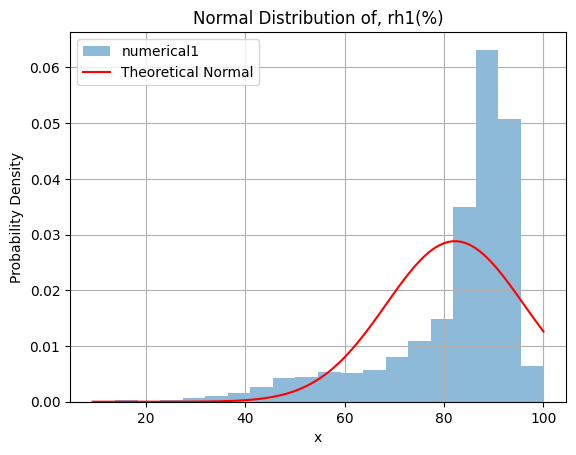

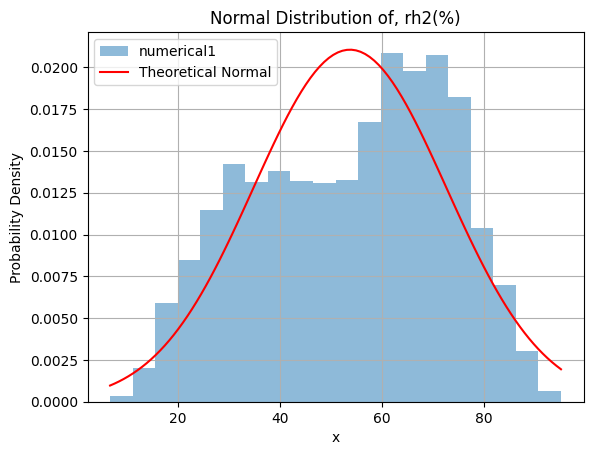

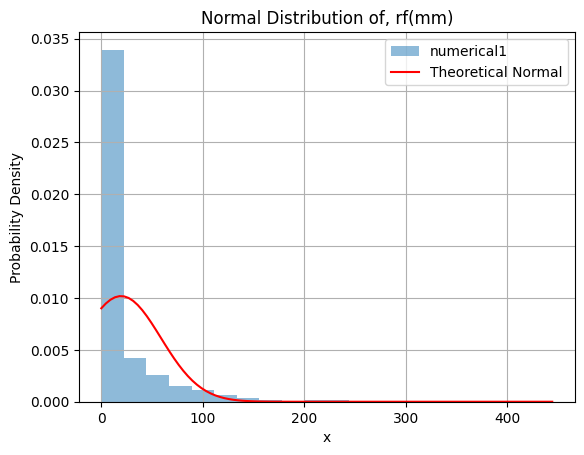

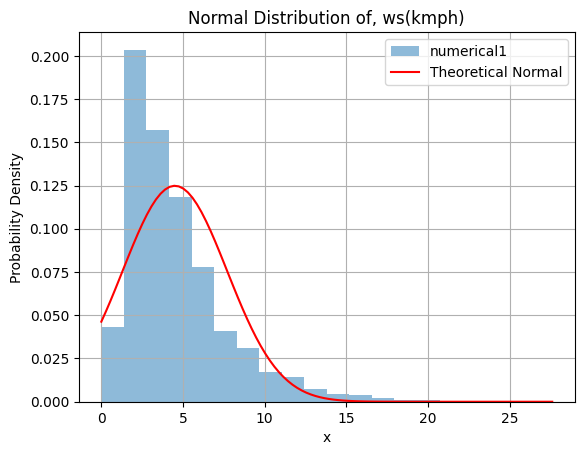

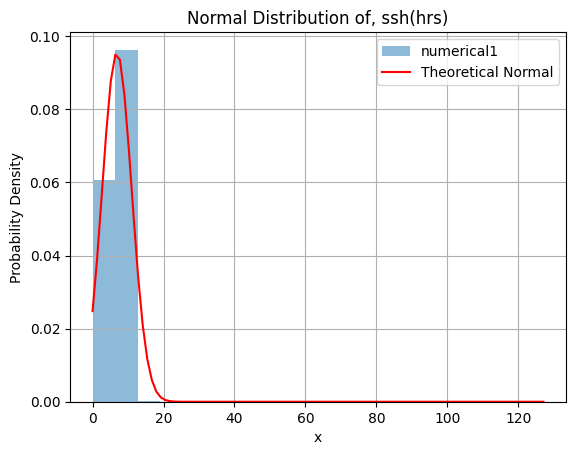

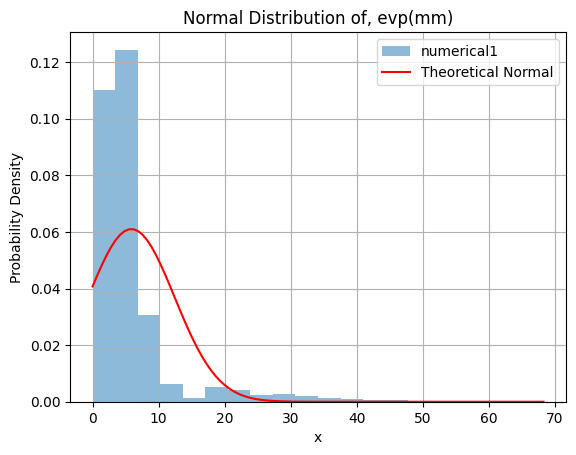

In [32]:
# Theoreticla Normal distribution plots for all columns of the numerical data
# Data not normally distributed
for column in numerical.columns:
    numerical1 = numerical[column]
    
    num_mean = np.mean(numerical1) 
    num_std_dev = np.std(numerical1)
    
    x_axis = np.linspace(min(numerical1), max(numerical1), 100)
    pdf = (1/(num_std_dev * np.sqrt(2 * np.pi))) * np.exp(- ((x_axis - num_mean) ** 2)/(2 * num_std_dev ** 2))
    
    plt.hist(numerical1, bins = 20, density = True, alpha = 0.5, label = 'numerical1')
    plt.plot(x_axis, pdf, color = 'red', label ='Theoretical Normal')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title(f'Normal Distribution of, {column}')
    plt.legend()
    plt.grid(True)
    plt.show()

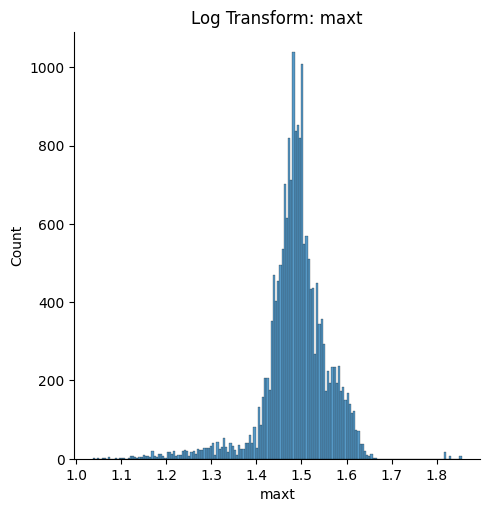

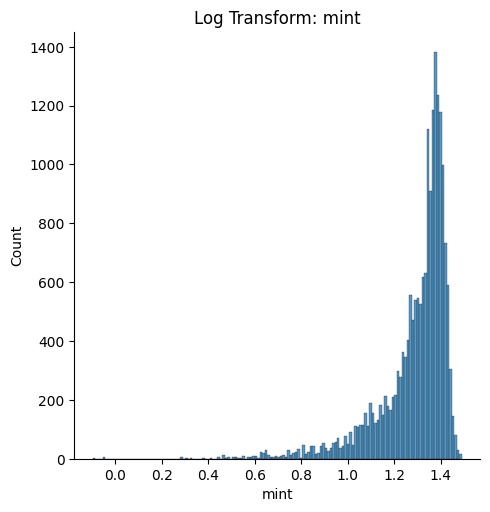

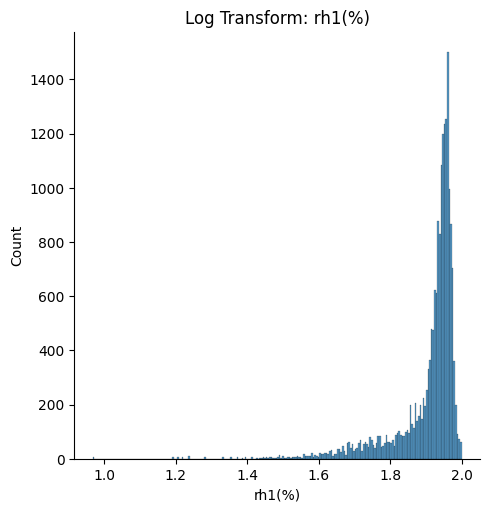

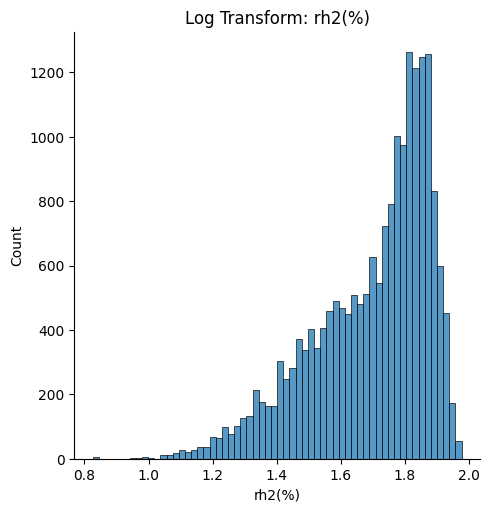

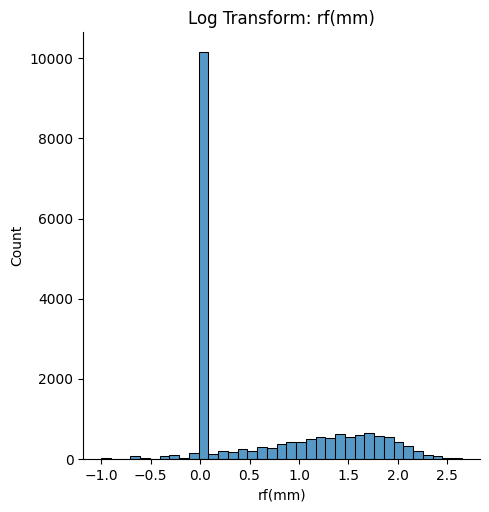

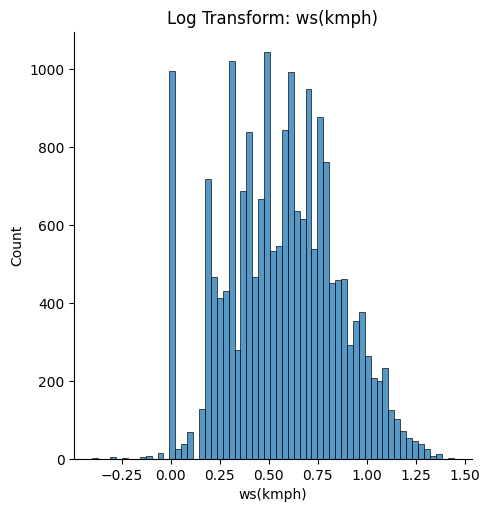

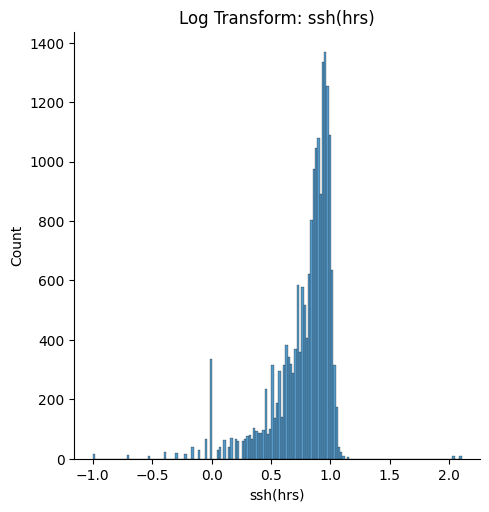

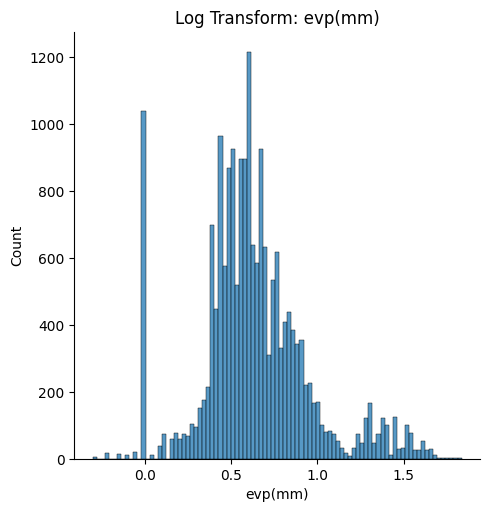

In [33]:
# Log10 tranformation to improve normality of the numerical data
def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
    
for col in numerical:
    transformed = numerical[col].apply(log_transfom_clean1)
    sns.displot( transformed)
    plt.title(f'Log Transform: {col}')
    plt.show()

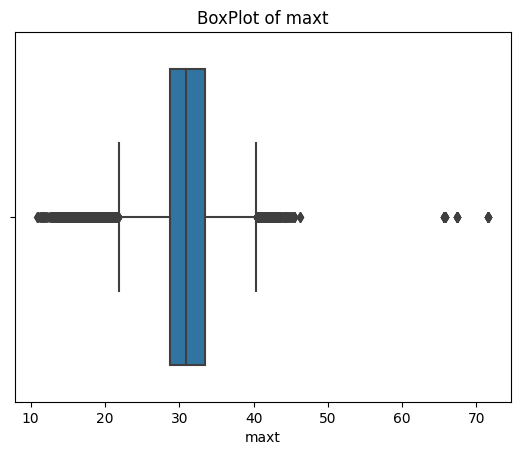

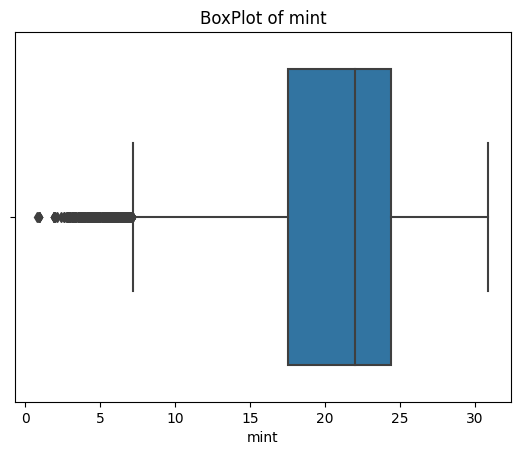

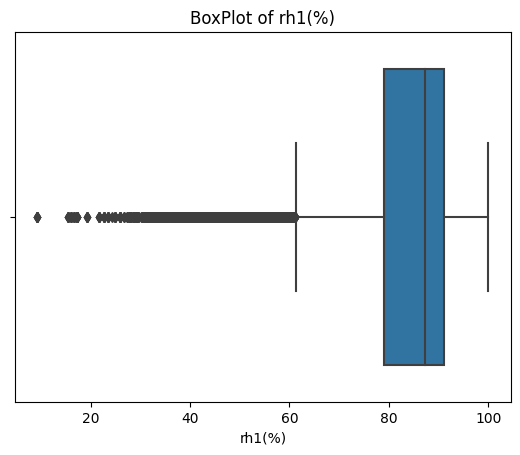

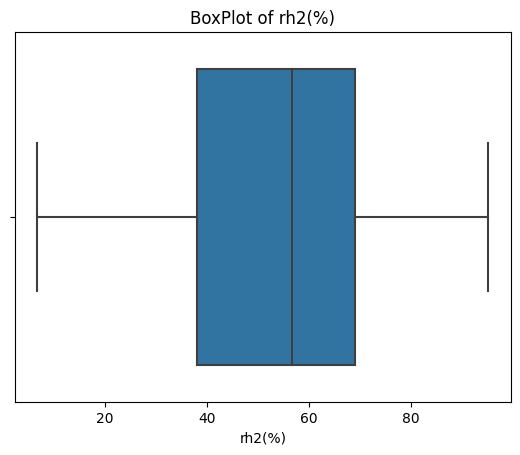

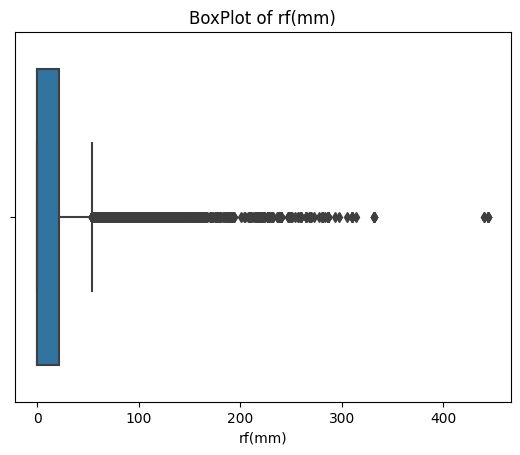

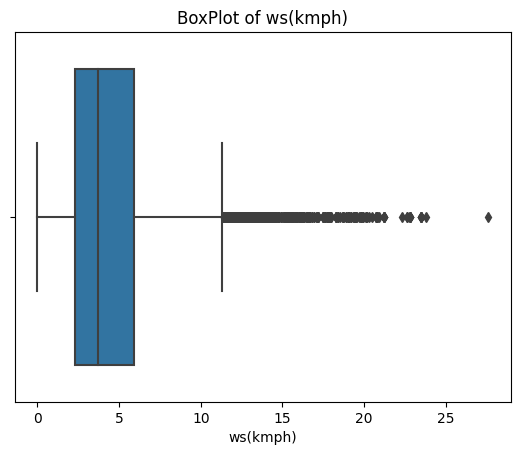

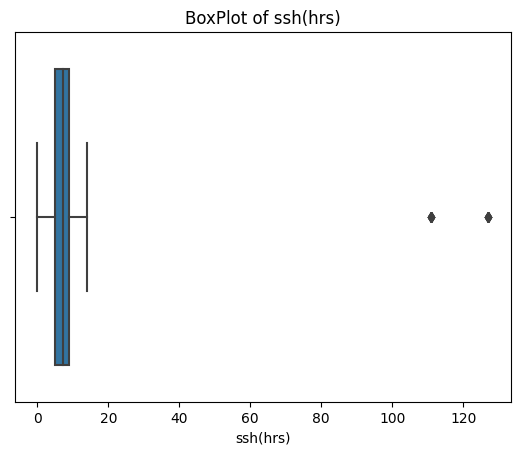

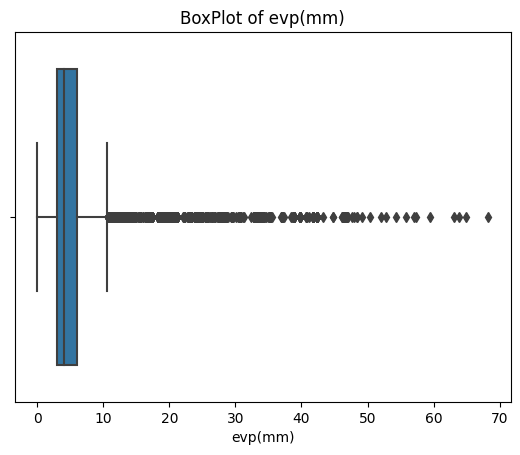

In [34]:
def boxPlots(numerical):                                # boxplots of the numerical data showing some outliers
    for column in numerical.columns:
        fig, ax = plt.subplots()
        sns.boxplot(x = numerical[column])
        plt.xlabel(column)
        plt.title(f'BoxPlot of {column}')
        plt.show()
        
df = pd.DataFrame(numerical)
boxPlots(df)

# Checking and Plotting Categorical Data with differing Counts in File1

In [35]:
categorical.isna().values.any() # checking if NaN values exist

False

In [36]:
def check_categorical_variables(categorical):    # Checking data counts in order to determine the possibility of merging categories
    for col in categorical.columns:
        counts_val = categorical[col].value_counts()
        num_counts = len(counts_val)

        print(f"Column: {col}")
        print(f" counts_val: { counts_val}")
        print(f" num_counts: { num_counts}")
        print('\n')

check_categorical_variables(categorical)

Column: collection_type
 counts_val: collection_type
Number/Light trap        16430
Percentage                2298
Number/Pheromone trap      520
Percent Damage             104
Number/hill                 52
Name: count, dtype: int64
 num_counts: 5


Column: pest_name
 counts_val: pest_name
Yellowstemborer           4333
Gallmidge                 3016
Greenleafhopper           2287
LeafBlast                 2090
Brownplanthopper          1958
LeafFolder                1716
Whitebackedplanthopper    1248
Miridbug                  1144
Caseworm                   936
ZigZagleafhopper           468
NeckBlast                  208
Name: count, dtype: int64
 num_counts: 11


Column: location
 counts_val: location
Maruteru         7053
Rajendranagar    5539
Raipur           2132
Ludhiana         1976
Cuttack          1456
Palampur         1248
Name: count, dtype: int64
 num_counts: 6


Column: observation_year
 counts_val: observation_year
2007    1612
2008    1352
2009    1300
2001    1196
20

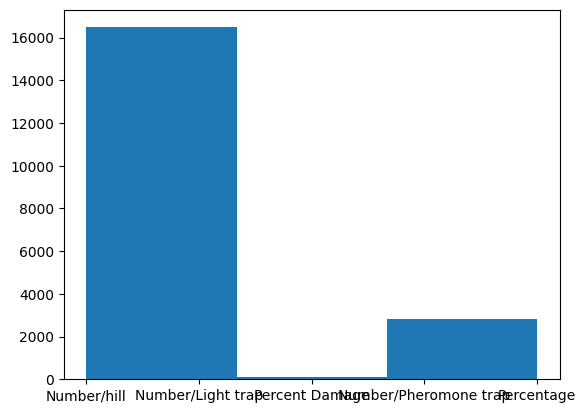

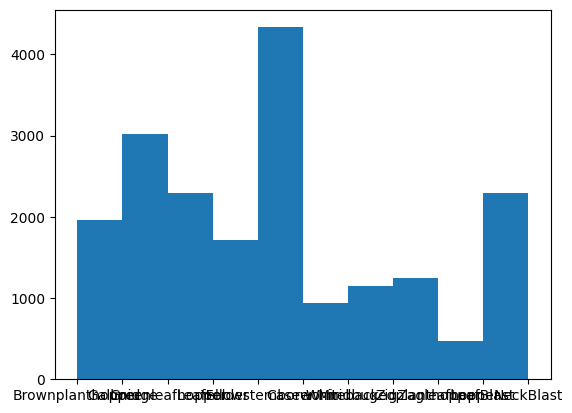

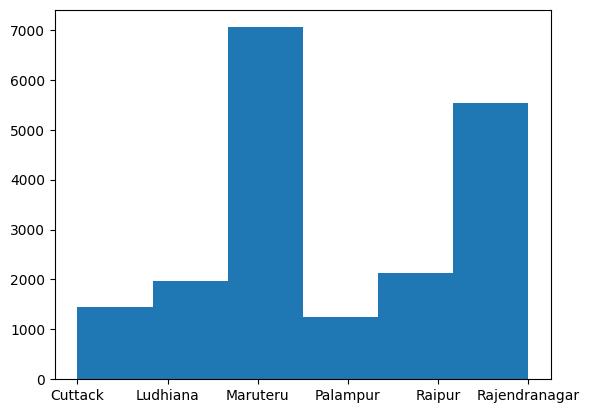

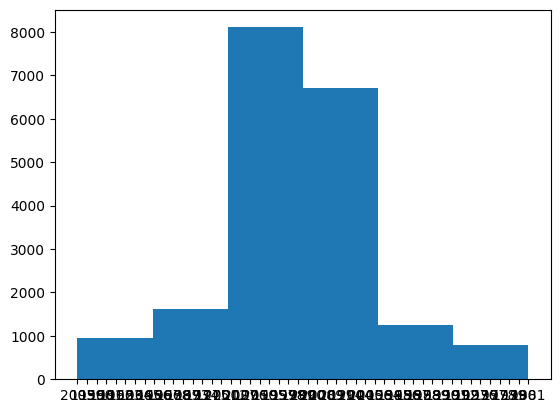

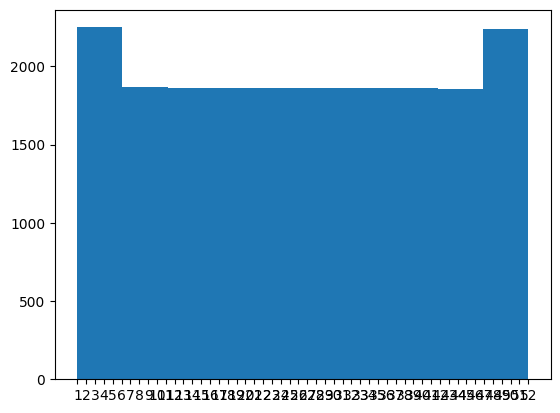

In [37]:
def distrPlots(categorical):          # histogram graphs for al categorical variables with large ranges
    plt.hist(categorical['collection_type'], bins = 3)  
    plt.show()
    plt.hist(categorical['pest_name'], bins = 10)  
    plt.show()
    plt.hist(categorical['location'], bins = 6)  
    plt.show()
    plt.hist(categorical['observation_year'], bins = 6)  
    plt.show()
    plt.hist(categorical['standard_week'], bins = 10)  
    plt.show()
    #return discrete_df
distrPlots(categorical)

In [38]:
categorical['collection_type'].replace({'Number/Pheromone trap': 'others', 'Percent Damage':'others', 'Number/hill':'others'}, inplace = True)

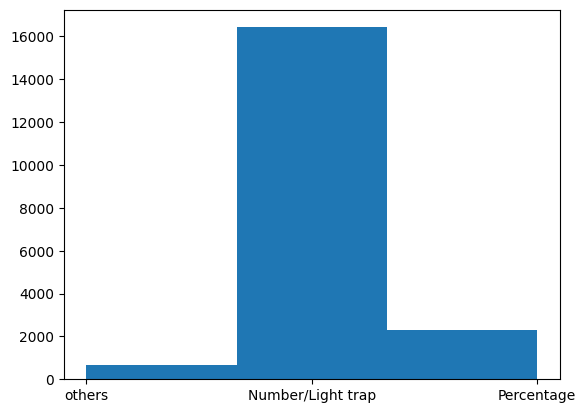

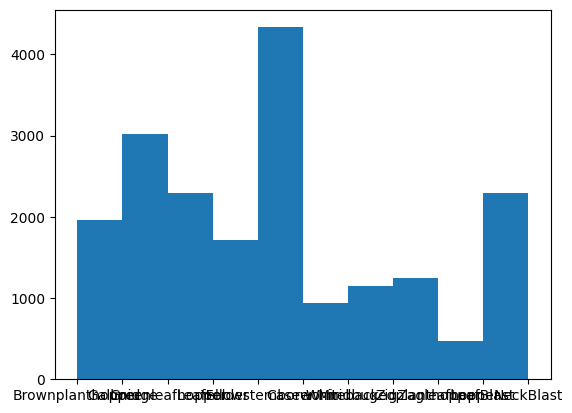

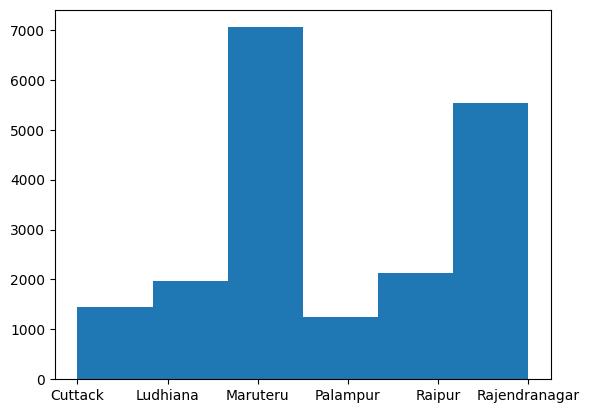

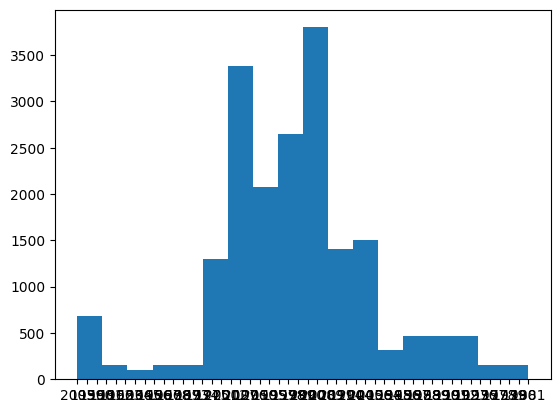

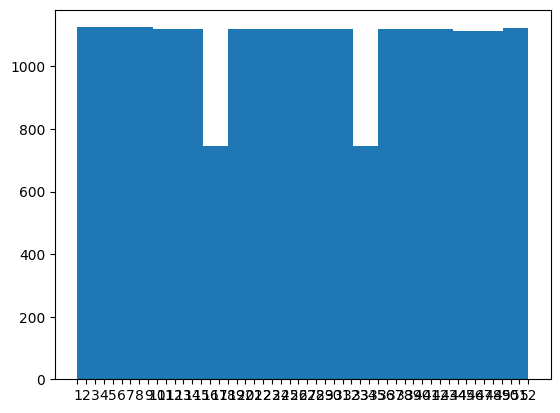

In [39]:
def distrPlots(categorical):          # histogram graphs for al categorical variables with large ranges
    plt.hist(categorical['collection_type'], bins = 3)  
    plt.show()
    plt.hist(categorical['pest_name'], bins = 10)  
    plt.show()
    plt.hist(categorical['location'], bins = 6)  
    plt.show()
    plt.hist(categorical['observation_year'], bins = 18)  
    plt.show()
    plt.hist(categorical['standard_week'], bins = 18)  
    plt.show()
    #return discrete_df
distrPlots(categorical)

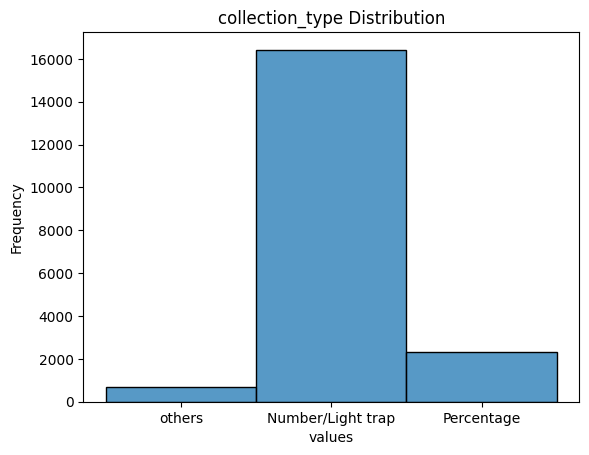

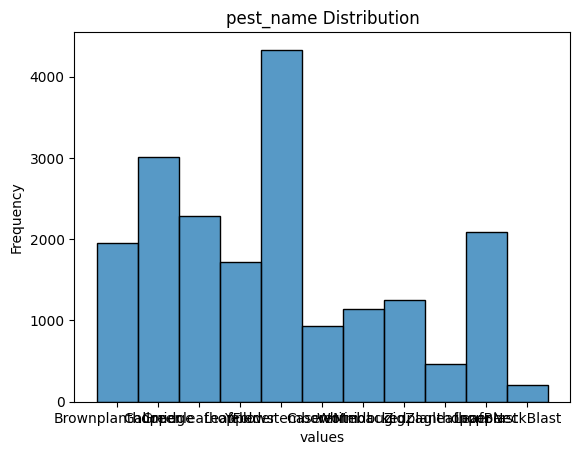

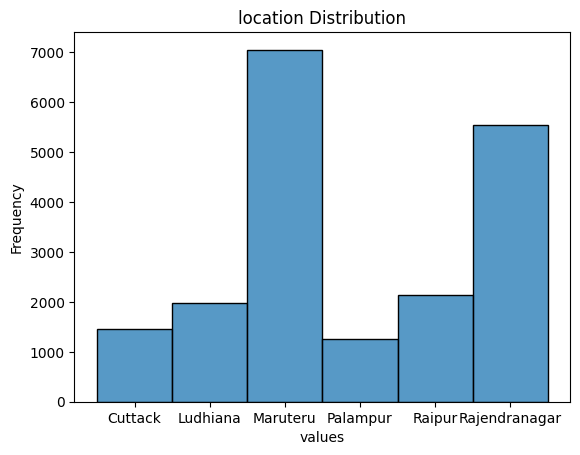

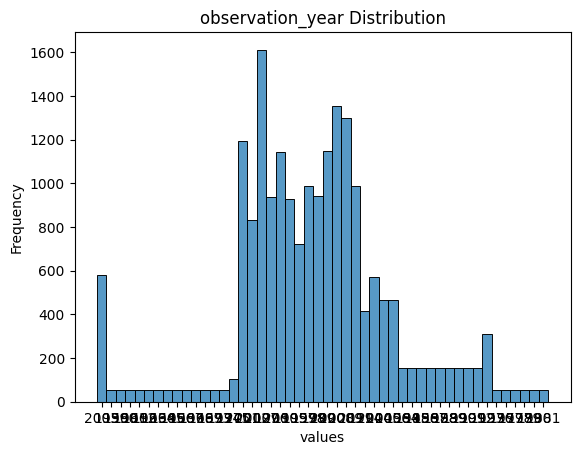

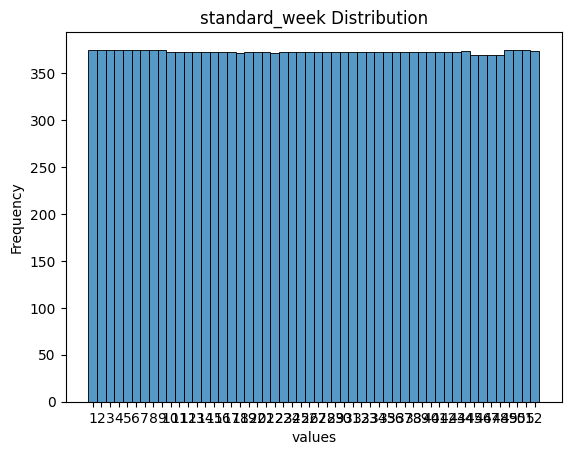

In [40]:
def histoPlot(categorical):
    for column in categorical.columns:
        sns.histplot(categorical[column])
        plt.xlabel('values')
        plt.ylabel('Frequency')
        plt.title(f'{column} Distribution')
        plt.show()
        
histoPlot(categorical)

# Data Cleaning, Checking and Filling NaNs File1

In [41]:
#merged_data.dtypes

In [42]:
#merged_data.isna().sum()

In [43]:
merged_data['pest_value'].value_counts()

pest_value
3.807692      2
3.461538      2
315.250000    1
5.173077      1
9.961538      1
             ..
14.096154     1
149.923077    1
21.653846     1
1.865385      1
1.192308      1
Name: count, Length: 87, dtype: int64

# Exploratory Data Analysis for Merged_Data

In [44]:
merged_data

,observation_year,location,pest_value,maxt,mint,rh1(%),rh2(%),rf(mm),ws(kmph),ssh(hrs),evp(mm),rice_area_(1000_ha),rice_production_(1000_tons),rice_yield_(kg_per_ha)
0,1995,Raipur,102.615385,33.440385,19.844231,77.734615,46.436538,13.944231,6.300000,6.896154,5.921154,908.40,1314.90,1447.49
1,1995,Raipur,159.557692,33.440385,19.844231,77.734615,46.436538,13.944231,6.300000,6.896154,5.921154,908.40,1314.90,1447.49
2,1995,Cuttack,6.192308,31.690385,21.546154,90.638462,56.525000,29.148077,4.834615,7.228846,4.309615,572.11,811.68,1418.75
3,1995,Ludhiana,4.663462,29.417308,16.576923,82.298077,45.909615,23.830769,4.317308,8.790385,4.515385,242.00,782.75,3234.50
4,1996,Raipur,10.153846,33.159615,19.659615,77.067308,42.326923,20.178846,4.546154,7.357692,5.950000,860.40,1448.80,1683.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2011,Ludhiana,1.500000,29.805769,17.592308,87.494231,53.300000,24.957692,0.000000,6.788462,0.000000,269.90,1148.60,4255.65
85,2011,Ludhiana,0.538462,29.805769,17.592308,87.494231,53.300000,24.957692,0.000000,6.788462,0.000000,269.90,1148.60,4255.65
86,2011,Ludhiana,3.807692,29.805769,17.592308,87.494231,53.300000,24.957692,0.000000,6.788462,0.000000,269.90,1148.60,4255.65
87,2011,Ludhiana,10.826923,29.805769,17.592308,87.494231,53.300000,24.957692,0.000000,6.788462,0.000000,269.90,1148.60,4255.65


In [45]:
y_target = merged_data['rice_yield_(kg_per_ha)']   # target
y_target

0     1447.49
1     1447.49
2     1418.75
3     3234.50
4     1683.87
       ...   
84    4255.65
85    4255.65
86    4255.65
87    4255.65
88    4255.65
Name: rice_yield_(kg_per_ha), Length: 89, dtype: float64

In [46]:
categorical_1 = merged_data.select_dtypes(include = object)     # extracting categorical data
cat_extra_1 = merged_data[['observation_year']]
categorical_1 = pd.concat([categorical_1, cat_extra_1], axis = 1)
#categorical_1

In [47]:
categorical_1['observation_year'] = categorical_1['observation_year'].astype(str)  # converting date to object
categorical_1.dtypes

location            object
observation_year    object
dtype: object

In [48]:
numerical_1 = merged_data.select_dtypes(np.number) # extracting numerical data from the main data for analyses
num_drop_1 = ['observation_year', 'rice_yield_(kg_per_ha)']
numerical_1 = numerical_1.drop(columns = num_drop_1)
numerical_1.head()

,pest_value,maxt,mint,rh1(%),rh2(%),rf(mm),ws(kmph),ssh(hrs),evp(mm),rice_area_(1000_ha),rice_production_(1000_tons)
0,102.615385,33.440385,19.844231,77.734615,46.436538,13.944231,6.300000,6.896154,5.921154,908.40,1314.90
1,159.557692,33.440385,19.844231,77.734615,46.436538,13.944231,6.300000,6.896154,5.921154,908.40,1314.90
2,6.192308,31.690385,21.546154,90.638462,56.525000,29.148077,4.834615,7.228846,4.309615,572.11,811.68
3,4.663462,29.417308,16.576923,82.298077,45.909615,23.830769,4.317308,8.790385,4.515385,242.00,782.75
4,10.153846,33.159615,19.659615,77.067308,42.326923,20.178846,4.546154,7.357692,5.950000,860.40,1448.80


In [49]:
numerical_1.describe().T # transposing the data for further analyses especially with respect to correlation

,count,mean,std,min,25%,50%,75%,max
pest_value,89.0,260.472612,942.141328,0.107692,3.807692,15.740385,93.903846,6753.750000
maxt,89.0,31.622461,1.425829,29.415385,30.073077,32.025000,32.767308,33.946154
mint,89.0,19.348163,1.773248,16.576923,17.465385,19.584615,20.367308,22.986538
rh1(%),89.0,82.034529,6.443354,63.417308,79.296154,83.240385,85.303846,92.628846
rh2(%),89.0,48.079235,5.808261,40.365385,43.334615,47.253846,52.632692,63.442308
rf(mm),89.0,20.082120,5.629938,11.200000,15.094231,20.082692,23.130769,36.663462
ws(kmph),89.0,4.658157,1.602305,0.000000,4.188462,4.925000,5.296154,8.155769
ssh(hrs),89.0,6.997731,0.526310,6.134615,6.653846,6.788462,7.275000,8.790385
evp(mm),89.0,4.579624,1.375243,0.000000,4.390385,4.736538,5.338462,6.232692
rice_area_(1000_ha),89.0,603.664494,305.850812,242.000000,269.300000,570.940000,912.530000,956.630000


In [50]:
correlations_matrix = pd.concat([numerical_1, y_target], axis = 1).corr()     # correlation matrix to see pairs that influence each other
correlations_matrix

,pest_value,maxt,mint,rh1(%),rh2(%),rf(mm),ws(kmph),ssh(hrs),evp(mm),rice_area_(1000_ha),rice_production_(1000_tons),rice_yield_(kg_per_ha)
pest_value,1.000000,-0.105448,-0.021324,0.143396,0.101830,-0.215480,0.017961,0.042447,-0.014366,-0.125254,-0.012471,0.112059
maxt,-0.105448,1.000000,0.726580,-0.145389,-0.388813,0.117105,0.302168,-0.456663,0.642112,0.937692,-0.023835,-0.888081
mint,-0.021324,0.726580,1.000000,0.262121,0.238493,0.514447,0.247082,-0.606509,0.340610,0.616977,-0.260825,-0.814983
rh1(%),0.143396,-0.145389,0.262121,1.000000,0.820137,0.238627,-0.597925,-0.037384,-0.352564,-0.268976,-0.379577,-0.016520
rh2(%),0.101830,-0.388813,0.238493,0.820137,1.000000,0.412457,-0.398430,-0.140781,-0.502938,-0.471580,-0.408517,0.131998
rf(mm),-0.215480,0.117105,0.514447,0.238627,0.412457,1.000000,-0.158482,-0.375879,-0.259317,0.130954,-0.130282,-0.313097
ws(kmph),0.017961,0.302168,0.247082,-0.597925,-0.398430,-0.158482,1.000000,-0.016371,0.715190,0.304194,0.022439,-0.280799
ssh(hrs),0.042447,-0.456663,-0.606509,-0.037384,-0.140781,-0.375879,-0.016371,1.000000,-0.007866,-0.514986,-0.126982,0.466586
evp(mm),-0.014366,0.642112,0.340610,-0.352564,-0.502938,-0.259317,0.715190,-0.007866,1.000000,0.594228,0.082529,-0.501285
rice_area_(1000_ha),-0.125254,0.937692,0.616977,-0.268976,-0.471580,0.130954,0.304194,-0.514986,0.594228,1.000000,0.052562,-0.880929


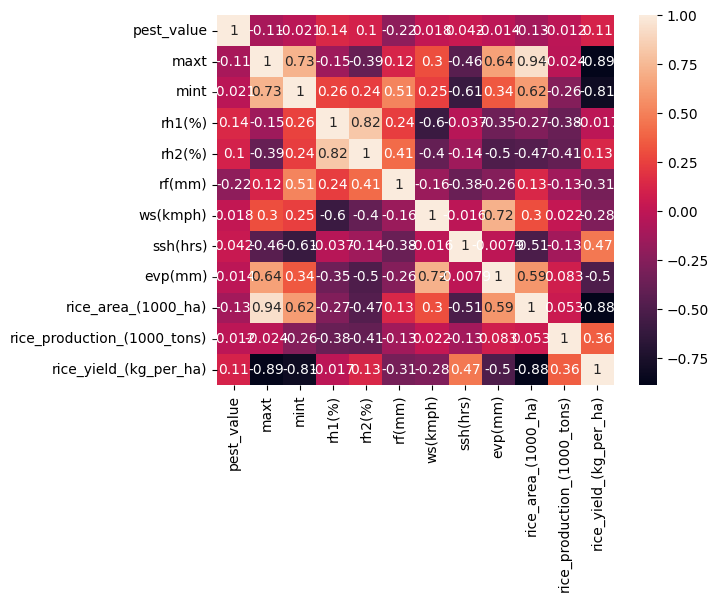

In [51]:
sns.heatmap(correlations_matrix, annot=True) # heat map using colours to show level of correlation; how the various colimns are related to each other 
plt.show()

# Plots for Numerical Data, Merged

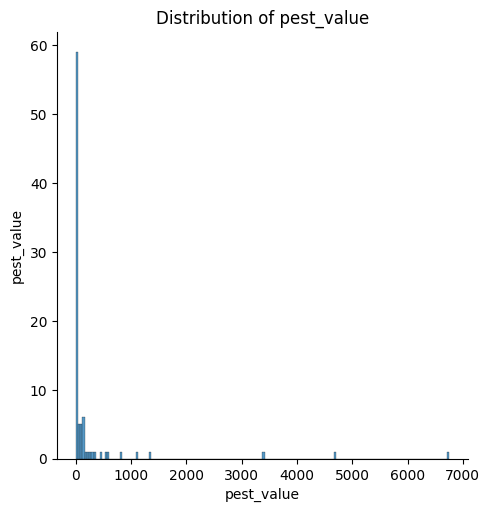

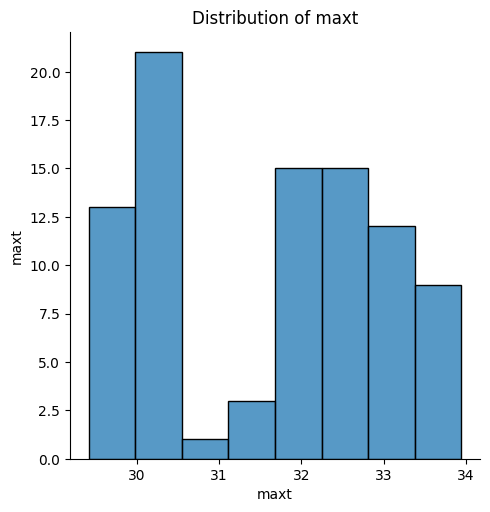

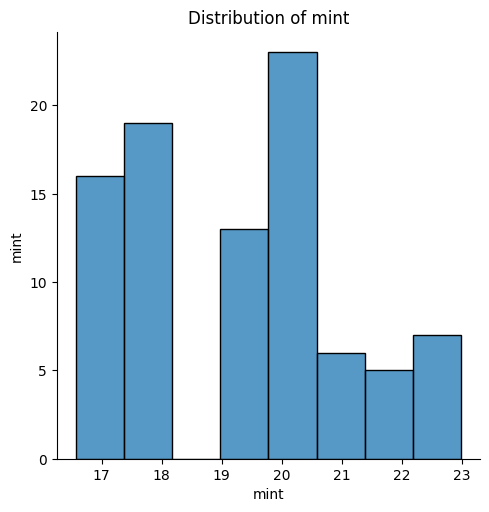

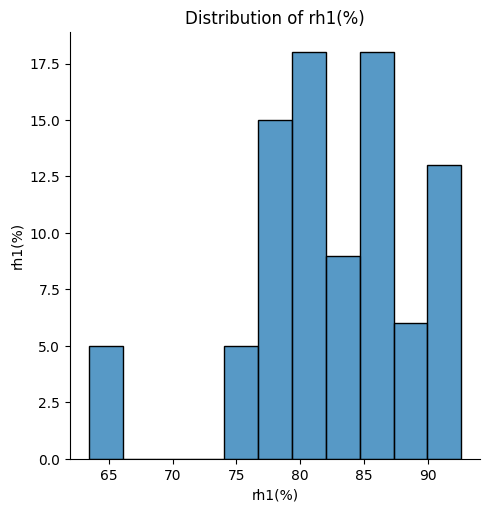

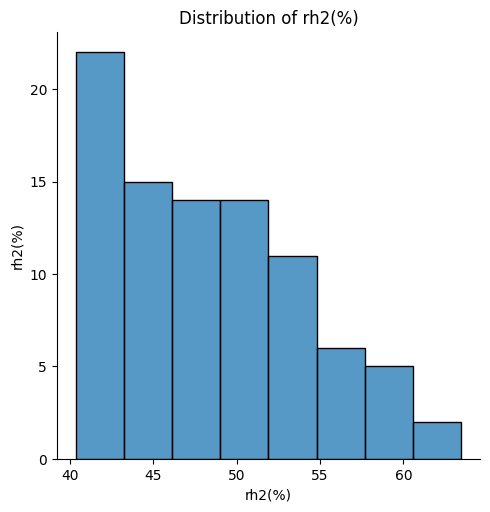

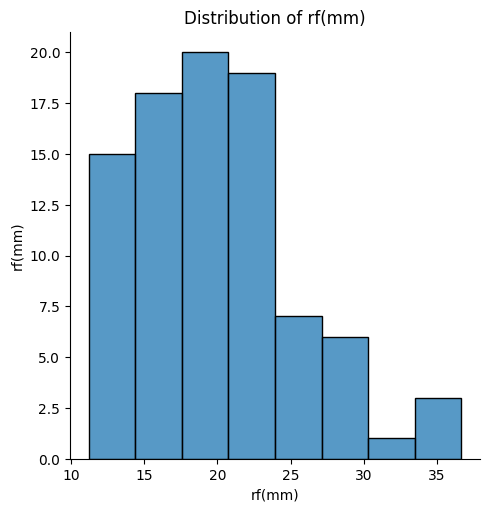

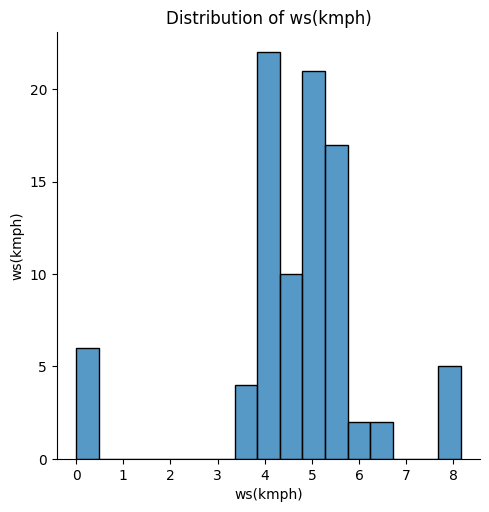

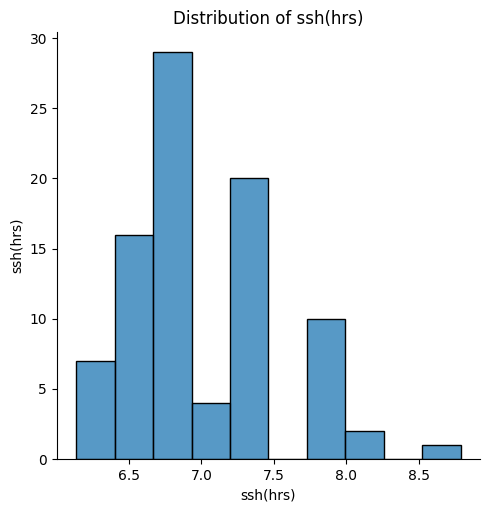

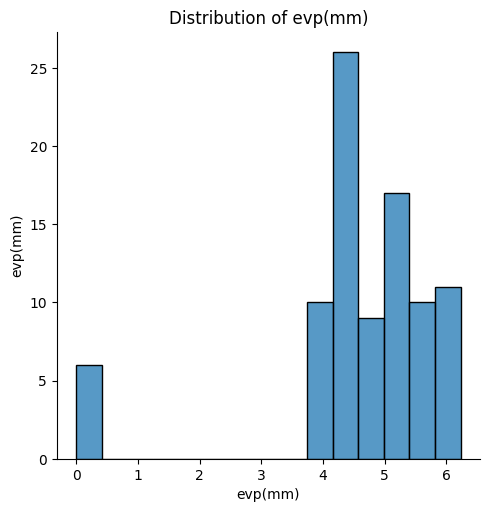

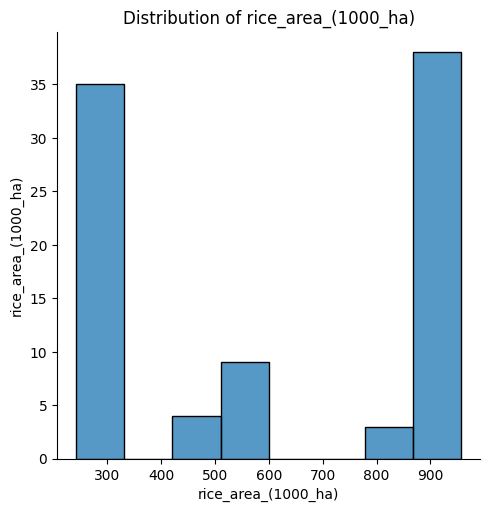

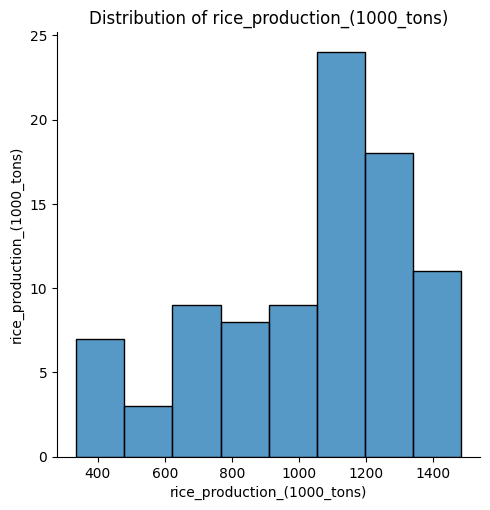

In [52]:
def chartPlots(numerical_1):                         #   # distribution plots for merged data
    for column in numerical_1.columns:
        sns.displot(numerical_1[column])
        plt.xlabel(column)
        plt.ylabel(column)
        plt.title(f'Distribution of {column}')
        plt.show()
        
df = pd.DataFrame(numerical_1)
chartPlots(df)

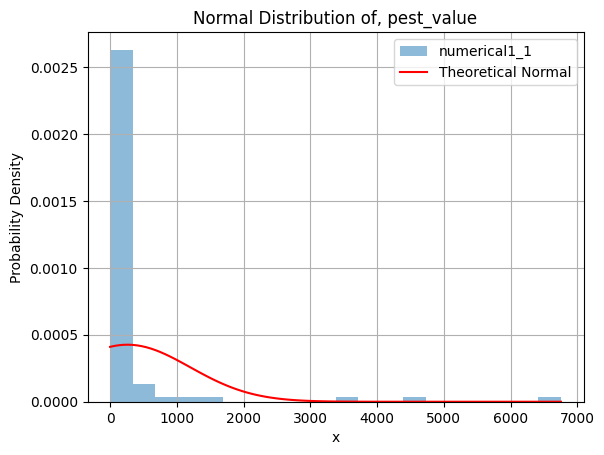

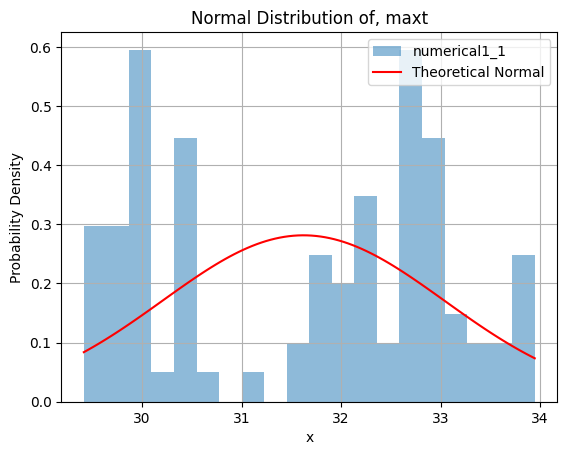

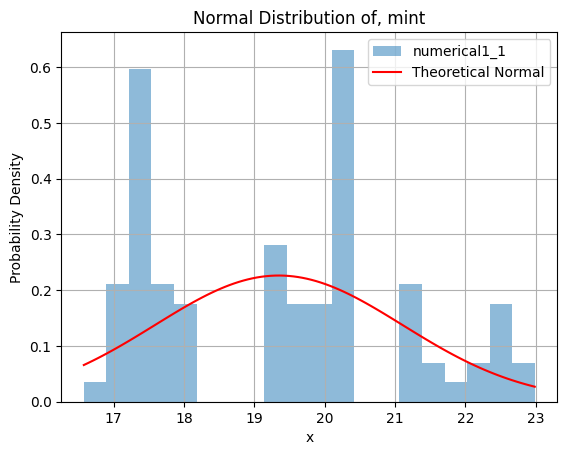

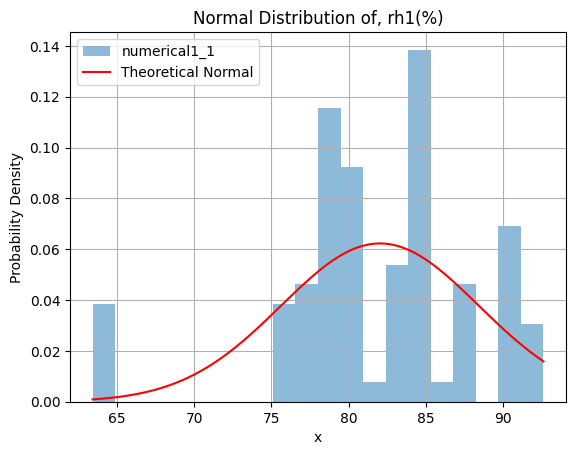

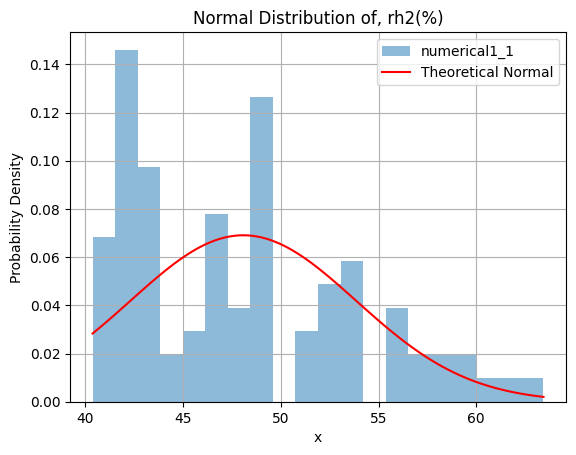

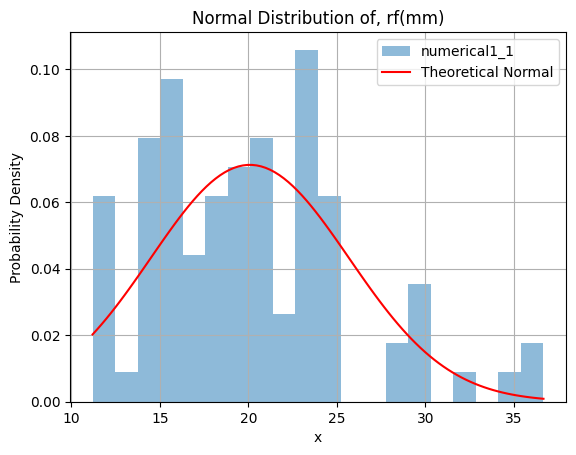

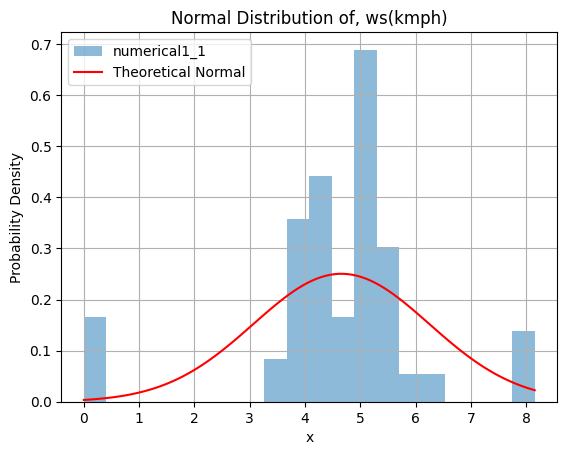

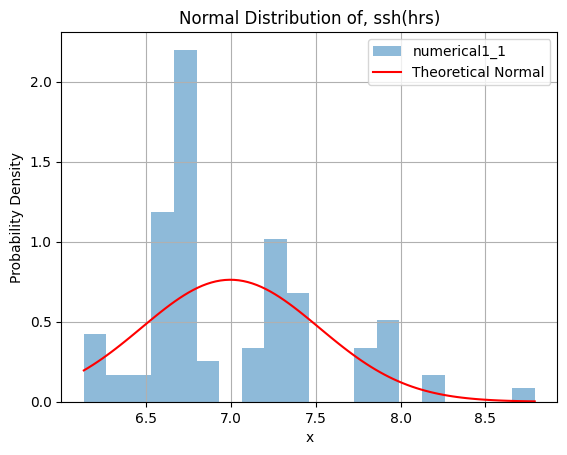

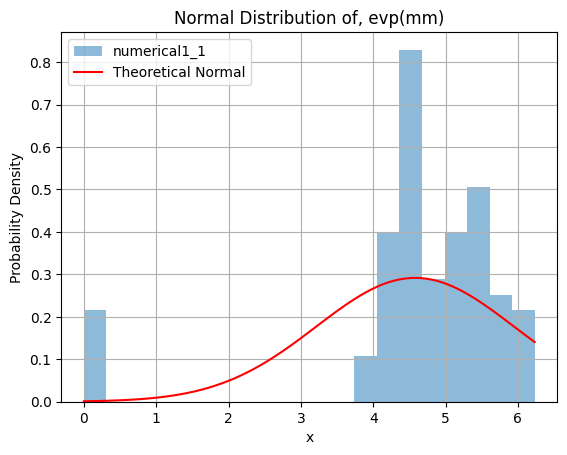

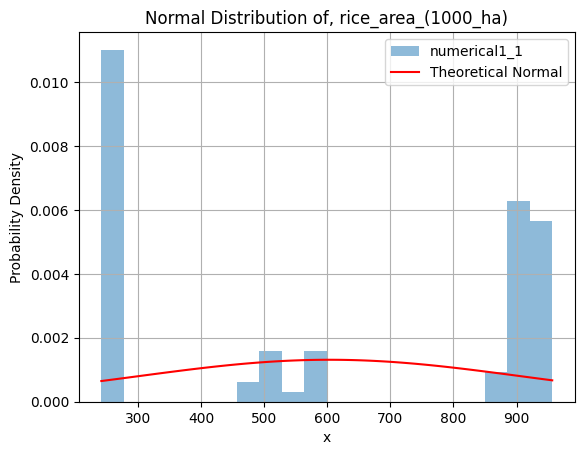

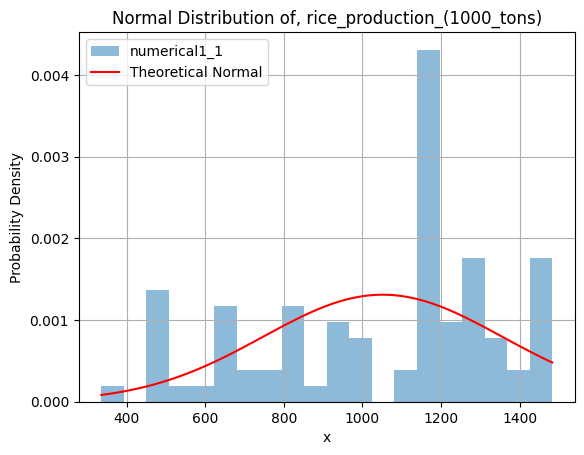

In [53]:
# Theoreticla Normal distribution plots for all columns, merged data
for column in numerical_1.columns:
    numerical1_1 = numerical_1[column]
    
    num_mean = np.mean(numerical1_1) 
    num_std_dev = np.std(numerical1_1)
    
    x_axis = np.linspace(min(numerical1_1), max(numerical1_1), 100)
    pdf = (1/(num_std_dev * np.sqrt(2 * np.pi))) * np.exp(- ((x_axis - num_mean) ** 2)/(2 * num_std_dev ** 2))
    
    plt.hist(numerical1_1, bins = 20, density = True, alpha = 0.5, label = 'numerical1_1')
    plt.plot(x_axis, pdf, color = 'red', label ='Theoretical Normal')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title(f'Normal Distribution of, {column}')
    plt.legend()
    plt.grid(True)
    plt.show()

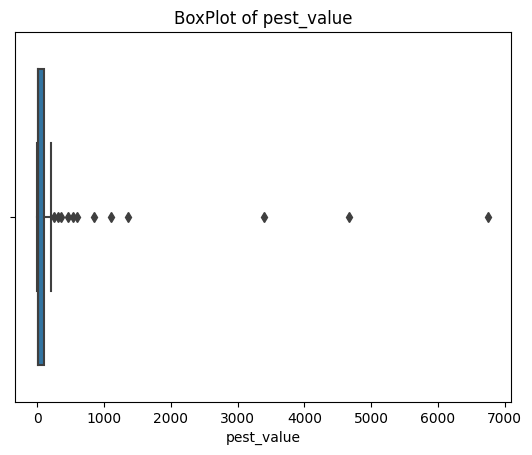

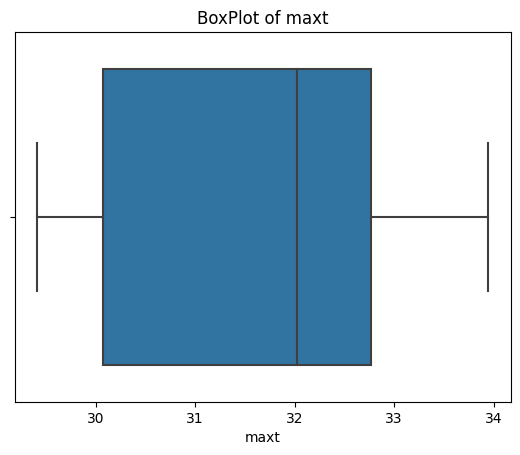

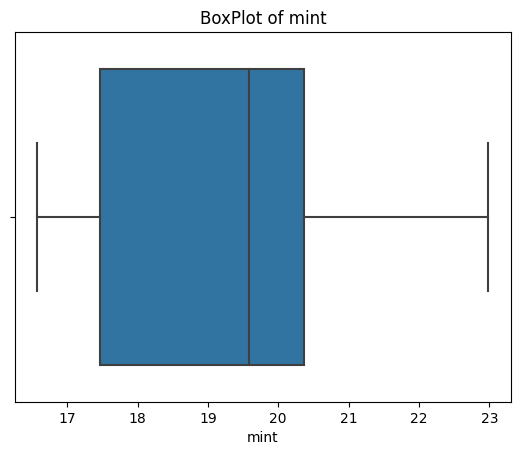

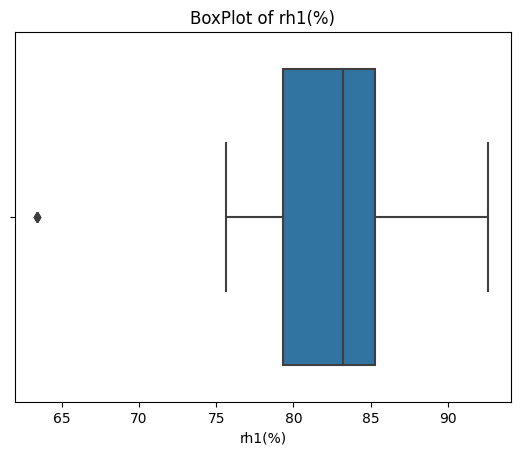

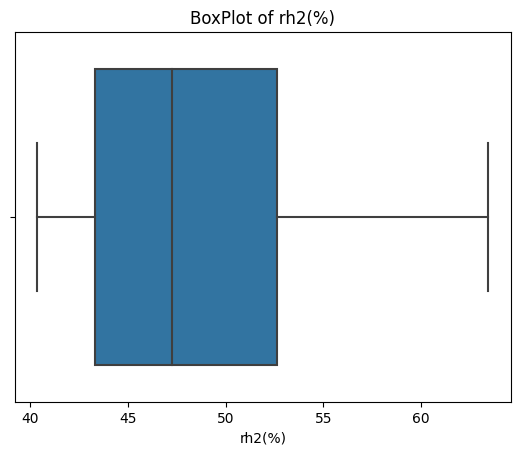

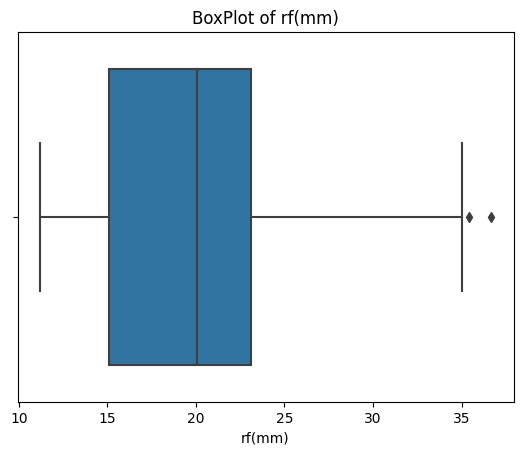

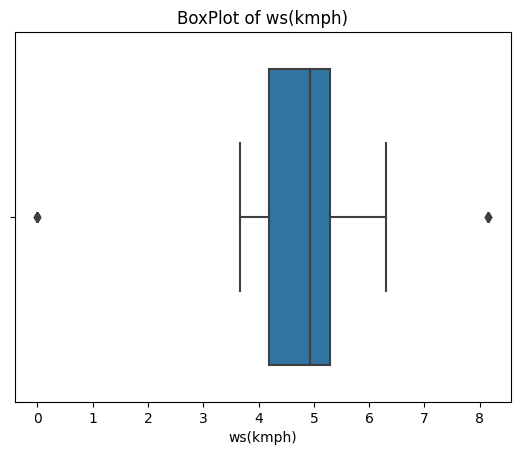

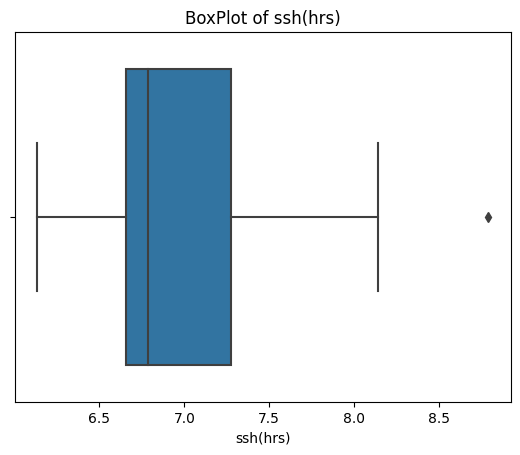

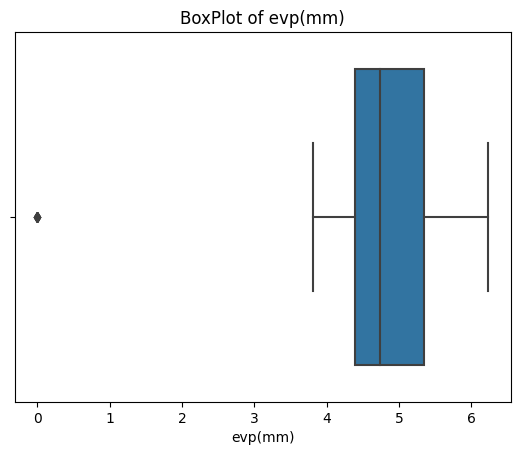

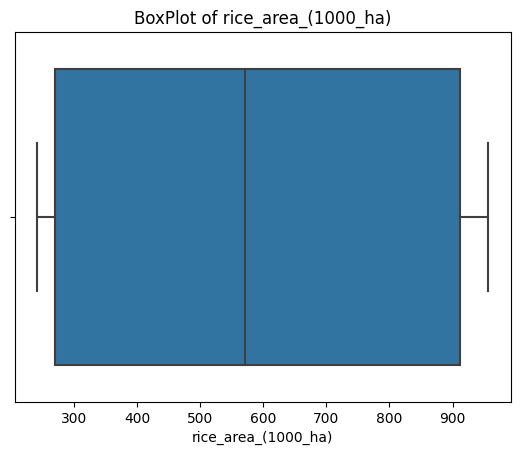

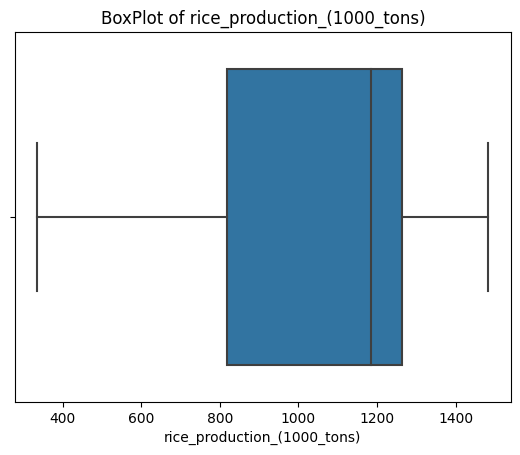

In [54]:
def boxPlots(numerical_1):                                # boxplots for merged data
    for column in numerical_1.columns:
        fig, ax = plt.subplots()
        sns.boxplot(x = numerical_1[column])
        plt.xlabel(column)
        plt.title(f'BoxPlot of {column}')
        plt.show()
        
df = pd.DataFrame(numerical_1)
boxPlots(df)

# Checking and Plotting Categorical Data with differing Counts Merged_Data

In [55]:
categorical_1.isna().values.any() # checking if NaN values exist

False

In [56]:
def check_categorical_variables(categorical_1):    # Checking data counts in order to determine the possibility of merging categories
    for col in categorical_1.columns:
        counts_val = categorical_1[col].value_counts()
        num_counts = len(counts_val)

        print(f"Column: {col}")
        print(f" counts_val: { counts_val}")
        print(f" num_counts: { num_counts}")
        print('\n')

check_categorical_variables(categorical_1)

Column: location
 counts_val: location
Raipur      41
Ludhiana    35
Cuttack     13
Name: count, dtype: int64
 num_counts: 3


Column: observation_year
 counts_val: observation_year
2007    15
2008    10
2009     9
2000     8
2001     8
2010     6
2011     6
1998     5
1995     4
1996     4
1997     4
1999     4
2002     3
2003     3
Name: count, dtype: int64
 num_counts: 14




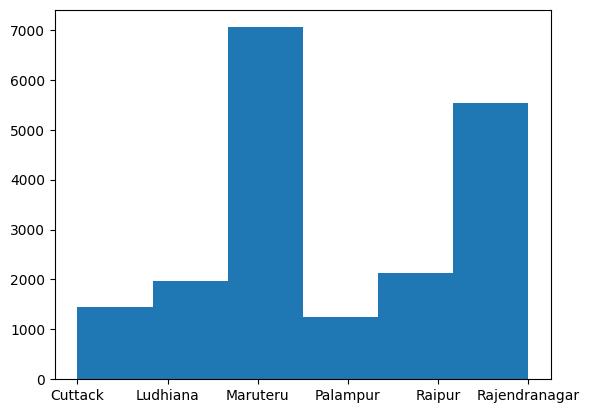

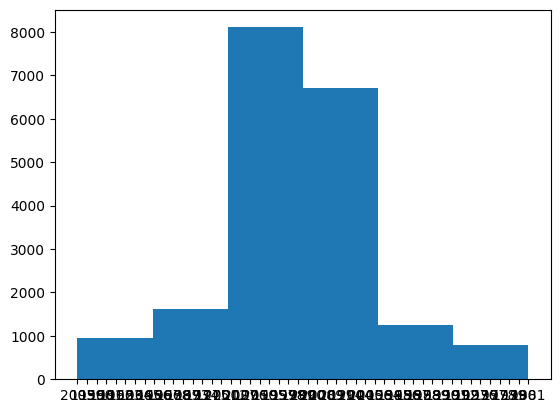

In [57]:
def distrPlots(categorical_1):          # histogram graphs for al categorical variables
    plt.hist(categorical['location'], bins = 6)  
    plt.show()
    plt.hist(categorical['observation_year'], bins = 6)  
    plt.show()
    
    #return discrete_df
distrPlots(categorical)

# Model Prediction

In [58]:
from sklearn.preprocessing import MinMaxScaler # # importing libraries for trnaformation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting the Data for Prediction

In [59]:
y = target_y                     # splitting data into X and y variables
X = pd.concat([numerical, categorical], axis=1)
# X_num = numerical
# X_cat = categorical

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # train_test_split

In [61]:
X_train_num = X_train.select_dtypes(include = np.number)    # categorizing splits into numerical and categorical sets
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

# Scaling(Transforming) and Encoding the Split Data

In [62]:
# applying the minmaxscaler on the nuerical training set to even the variables
# transformer = MinMaxScaler().fit(X_train_num) 
# X_train_scaled_arr = transformer.transform(X_train_num)
# X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
# X_train_scaled.head()

transformer = StandardScaler().fit(X_train_num) # alternative method for normalising the data
x_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(x_train_scaled_arr, columns=X_train_num.columns)
X_train_scaled .head()

,maxt,mint,rh1(%),rh2(%),rf(mm),ws(kmph),ssh(hrs),evp(mm)
0,-0.173838,-0.300550,0.543549,0.432289,-0.498489,-0.943556,0.630025,2.840286
1,0.053335,0.962116,0.810300,1.522957,-0.310579,0.956981,-0.365551,-0.287915
2,-0.566228,0.516469,0.298427,1.227897,-0.498489,0.770043,-0.697410,-0.441259
3,-0.256447,0.832135,0.255170,1.206822,1.548209,2.950987,-1.100382,-0.241912
4,-0.380359,0.275077,0.485874,0.806383,1.512659,-0.569680,-0.887044,-0.410590


In [63]:
# applying the minmaxscaler on the nuerical test set to even the variables
# X_test_scaled_arr = transformer.transform(X_test_num)
# X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
# X_test_scaled.head()

X_test_scaled_arr = transformer.transform(X_test_num)   # alternative method for normalising the data
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled.head()

,maxt,mint,rh1(%),rh2(%),rf(mm),ws(kmph),ssh(hrs),evp(mm)
0,2.283764,1.240645,-2.008606,-1.675282,-0.498489,0.770043,1.032997,0.632144
1,-0.999923,0.367920,0.543549,0.669391,-0.396916,-0.881243,-0.294439,-0.456593
2,0.115292,0.980684,0.572387,1.396503,0.293781,0.178073,0.037420,-0.456593
3,-0.958619,-1.414667,0.572387,-0.589883,-0.310579,-0.787774,0.274462,-0.379921
4,-0.008621,0.627881,0.334475,1.169939,0.694995,0.333854,-0.460368,3.392321


In [64]:
X_train_cat1 = X_train_cat[['observation_year', 'standard_week']]  # select test sets for dummy encoding
X_test_cat1 = X_test_cat[['observation_year', 'standard_week']]

X_train_cat2 = X_train_cat[['collection_type', 'pest_name', 'location']]   # main categorical data
X_test_cat2 = X_test_cat[['collection_type', 'pest_name', 'location']]

In [65]:
X_train_catordinal = pd.get_dummies(X_train_cat1)  # dummy encoding the select sets
X_test_catordinal = pd.get_dummies(X_test_cat1)

In [66]:
from sklearn.preprocessing import OneHotEncoder                 # applying onwhot encoding on the other categorical training sets
encoder = OneHotEncoder(drop='first').fit(X_train_cat2)
encoded_cat = encoder.transform(X_train_cat2).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat2.columns)

onehot_encoded_train = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded_train.head()

,collection_type_Percentage,collection_type_others,pest_name_Caseworm,pest_name_Gallmidge,pest_name_Greenleafhopper,pest_name_LeafBlast,pest_name_LeafFolder,pest_name_Miridbug,pest_name_NeckBlast,pest_name_Whitebackedplanthopper,pest_name_Yellowstemborer,pest_name_ZigZagleafhopper,location_Ludhiana,location_Maruteru,location_Palampur,location_Raipur,location_Rajendranagar
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
from sklearn.preprocessing import OneHotEncoder           #  # applying onwhot encoding on the other categorical test sets
encoded_cat = encoder.transform(X_test_cat2).toarray()
cols = encoder.get_feature_names_out(input_features=X_test_cat2.columns)

onehot_encoded_test = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded_test.head()

,collection_type_Percentage,collection_type_others,pest_name_Caseworm,pest_name_Gallmidge,pest_name_Greenleafhopper,pest_name_LeafBlast,pest_name_LeafFolder,pest_name_Miridbug,pest_name_NeckBlast,pest_name_Whitebackedplanthopper,pest_name_Yellowstemborer,pest_name_ZigZagleafhopper,location_Ludhiana,location_Maruteru,location_Palampur,location_Raipur,location_Rajendranagar
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
X_train_catordinal = X_train_catordinal.reset_index(drop=True)          # resetiing train encoded sets to avoid misalighnment when concatenating
onehot_encoded_train = onehot_encoded_train.reset_index(drop=True)

In [69]:
data1 = pd.concat([X_train_catordinal, onehot_encoded_train], axis=1)     # concatenating dummy and onehot encoded train sets

In [70]:
X_test_catordinal = X_test_catordinal.reset_index(drop=True)  # resetiing test encoded sets to avoid misalighnment when concatenating
onehot_encoded_test = onehot_encoded_test.reset_index(drop=True)

In [71]:
data2 = pd.concat([X_test_catordinal, onehot_encoded_test], axis=1)  # concatenating dummy and onehot encoded train sets

In [72]:
X_train_scaled_encoded = pd.concat([X_train_scaled, data1], axis=1)  # concatenating train_scaled and train_encoded sets 

In [73]:
X_train_scaled_encoded.isna().sum() # checking for NaNs

maxt                      0
mint                      0
rh1(%)                    0
rh2(%)                    0
rf(mm)                    0
                         ..
location_Ludhiana         0
location_Maruteru         0
location_Palampur         0
location_Raipur           0
location_Rajendranagar    0
Length: 125, dtype: int64

In [74]:
X_test_scaled_encoded = pd.concat([X_test_scaled, data2], axis=1)  # concatenating test_scaled and test_encoded sets

In [75]:
X_test_scaled_encoded.isna().sum() # checking for NaNs

maxt                      0
mint                      0
rh1(%)                    0
rh2(%)                    0
rf(mm)                    0
                         ..
location_Ludhiana         0
location_Maruteru         0
location_Palampur         0
location_Raipur           0
location_Rajendranagar    0
Length: 125, dtype: int64

# Applying Linear Regression Model

In [76]:
X_train_scaled = X_train_scaled.reset_index(drop=True)   # resetiing train scaled sets to avoid misalighnment when concatenating
X_test_scaled = X_test_scaled.reset_index(drop=True)

In [77]:
y_train = y_train.reset_index(drop=True)   # resetiing train scaled sets to avoid misalighnment when concatenating
y_test = y_test.reset_index(drop=True)

In [78]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # importing and applying the linear model
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_scaled_encoded,y_train)

LinearRegression()

In [79]:
pred_train = lm.predict(X_train_scaled_encoded)
r2_score(y_train, pred_train )

0.07094294639932497

In [80]:
pred_test = lm.predict(X_test_scaled_encoded)   # r2_score for the test
r2_score(y_test, pred_test)

0.08348867829000195

In [81]:
y_test[:5]

0      0.0
1    111.0
2      2.0
3      0.0
4     84.0
Name: pest_value, dtype: float64

In [82]:
pred_test[:5]

array([-600.,  168.,  192., 1468., 1064.])

In [83]:
mse=mean_squared_error(y_test,pred_test)
mse

11196340.897703454

In [84]:
rmse = np.sqrt(mean_squared_error(y_test,pred_test))
rmse

3346.093378509251

# Applying Random Forest Regression

In [85]:
from sklearn.ensemble import RandomForestRegressor


clf = RandomForestRegressor(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_scaled_encoded, y_train)
print(clf.score(X_train_scaled_encoded, y_train))
print(clf.score(X_test_scaled_encoded, y_test))

y_pred = clf.predict(X_test_scaled_encoded)
display(y_test.value_counts())

0.10878888925688412
0.059965471074141075


pest_value
0.0       1716
2.0         82
1.0         76
3.0         58
5.0         48
          ... 
435.0        1
1136.0       1
788.0        1
6920.0       1
210.0        1
Name: count, Length: 897, dtype: int64

In [86]:
y_pred[:5]

array([  79.53213542, 1248.94931336,   79.53213542,  572.24773936,
       1411.04503247])

In [87]:
from sklearn.model_selection import cross_val_score
clf = RandomForestRegressor(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                            # max_samples=0.8
                            )
cross_val_scores = cross_val_score(clf, X_train_scaled_encoded, y_train, cv=10)
print(np.mean(cross_val_scores))

0.05768716653202984


# Feature Selection

In [96]:
# from sklearn.feature_selection import RFE
# from sklearn import linear_model
# lm = linear_model.LinearRegression()
# rfe = RFE(lm, n_features_to_select=2, verbose=False)
# X_rfe = rfe.fit(numerical, y)

In [89]:
# selected_features = numerical.columns[rfe.support_]
# selected_features

In [90]:
#X_filtered = numerical.drop(selected_features, axis = 1)

# Splitting the Data for Prediction for Merged_Data

In [91]:
y_1 = y_target                     # splitting data into X and y variables
X_1 = pd.concat([numerical_1, categorical_1], axis=1)

In [92]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_1, y_1, test_size=0.2, random_state=42) # train_test_split

In [93]:
X_train_num_ = X_train_.select_dtypes(include = np.number)    # categorizing splits into numerical and categorical sets
X_test_num_  = X_test_.select_dtypes(include = np.number)
X_train_cat_ = X_train_.select_dtypes(include = object)
X_test_cat_  = X_test_.select_dtypes(include = object)

# Scaling(Transforming) and Encoding Merged_data

In [94]:
# applying the minmaxscaler on the nuerical training set to even the variables
transformer = MinMaxScaler().fit(X_train_num_) 
X_train_scaled_arr_ = transformer.transform(X_train_num_)
X_train_scaled_ = pd.DataFrame(X_train_scaled_arr_, columns=X_train_num_.columns)
X_train_scaled_.head()

,pest_value,maxt,mint,rh1(%),rh2(%),rf(mm),ws(kmph),ssh(hrs),evp(mm),rice_area_(1000_ha),rice_production_(1000_tons)
0,0.000064,0.086163,0.158416,0.824226,0.560500,0.540292,0.000000,0.246198,0.000000,0.039041,0.708424
1,0.001234,0.757216,0.549655,0.527847,0.153750,0.332905,0.666116,0.233888,0.880592,0.924422,0.684222
2,0.022183,0.792020,0.411941,0.548650,0.082667,0.152934,0.637350,0.429399,0.816106,0.906455,0.109929
3,0.502533,0.137521,0.138614,0.749045,0.377583,0.027415,0.549399,0.459812,0.717680,0.028826,0.744884
4,0.000368,0.145161,0.120012,0.749243,0.393417,0.293407,0.470880,0.676322,0.722308,0.007207,0.548121


In [95]:
# applying the minmaxscaler on the nuerical test set to even the variables
X_test_scaled_arr_ = transformer.transform(X_test_num_)
X_test_scaled_ = pd.DataFrame(X_test_scaled_arr_, columns=X_test_num_.columns)
X_test_scaled_.head()

,pest_value,maxt,mint,rh1(%),rh2(%),rf(mm),ws(kmph),ssh(hrs),evp(mm),rice_area_(1000_ha),rice_production_(1000_tons)
0,0.000588,0.137521,0.138614,0.749045,0.377583,0.027415,0.549399,0.459812,0.717680,0.028826,0.744884
1,0.000326,0.721986,0.572457,0.580053,0.132750,0.466883,0.649375,0.212165,0.856526,1.000000,1.000000
2,0.000212,0.145161,0.120012,0.749243,0.393417,0.293407,0.470880,0.676322,0.722308,0.007207,0.548121
3,0.025586,0.615450,0.596160,0.688677,0.487417,0.381844,0.528649,0.187545,0.782475,0.923555,0.267940
4,0.003176,0.721986,0.572457,0.580053,0.132750,0.444226,0.649375,0.212165,0.856526,1.000000,1.000000


In [97]:
# X_train_cat_ = X_train_cat_[['location', 'observation_year']]
# X_test_cat_ = X_test_cat_[['location', 'observation_year']]

In [98]:
#X_train_cat_

In [99]:
from sklearn.preprocessing import OneHotEncoder                # applying onwhot encoding on the other categorical training sets
encoder_ = OneHotEncoder(drop='first').fit(X_train_cat_)
encoded_cat_ = encoder_.transform(X_train_cat_).toarray()
cols = encoder_.get_feature_names_out(input_features = X_train_cat_.columns)

onehot_encoded_train_ = pd.DataFrame(encoded_cat_, columns=cols)
onehot_encoded_train_.head()

,location_Ludhiana,location_Raipur,observation_year_1996,observation_year_1997,observation_year_1998,observation_year_1999,observation_year_2000,observation_year_2001,observation_year_2002,observation_year_2003,observation_year_2007,observation_year_2008,observation_year_2009,observation_year_2010,observation_year_2011
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
from sklearn.preprocessing import OneHotEncoder           #  # applying onwhot encoding on the other categorical test sets
encoded_cat_ = encoder_.transform(X_test_cat_).toarray()
cols = encoder_.get_feature_names_out(input_features=X_test_cat_.columns)

onehot_encoded_test_ = pd.DataFrame(encoded_cat_, columns=cols)
onehot_encoded_test_.head()

,location_Ludhiana,location_Raipur,observation_year_1996,observation_year_1997,observation_year_1998,observation_year_1999,observation_year_2000,observation_year_2001,observation_year_2002,observation_year_2003,observation_year_2007,observation_year_2008,observation_year_2009,observation_year_2010,observation_year_2011
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Applying the Linear Regression Model, Merged_Data

In [101]:
X_train_scaled_ = X_train_scaled_.reset_index(drop=True)   # resetiing train scaled sets to avoid misalighnment when concatenating
X_test_scaled_ = X_test_scaled_.reset_index(drop=True)

In [102]:
X_train_scaled_encoded_ = pd.concat([X_train_scaled_, onehot_encoded_train_], axis=1)  # concatenating train_scaled and train_encoded sets
X_train_scaled_encoded_.shape

(71, 26)

In [103]:
X_test_scaled_encoded_ = pd.concat([X_test_scaled_, onehot_encoded_test_], axis=1)  # concatenating test_scaled and test_encoded sets
X_test_scaled_encoded_.shape

(18, 26)

In [104]:
#from sklearn.linear_model import LogisticRegression    # importing and applying the linear model
from sklearn.metrics import r2_score 
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_scaled_encoded_,y_train_)

LinearRegression()

In [105]:
pred_test = lm.predict(X_test_scaled_encoded_)   # r2_score for the test
r2_score(y_test_, pred_test)

0.9984104103622915

In [106]:
y_test_[:5]

44    4533.32
53    1550.53
30    3902.89
12     712.86
49    1550.53
Name: rice_yield_(kg_per_ha), dtype: float64

In [107]:
pred_test[:5]                                        # prediction

array([4443.94313537, 1582.05652528, 3906.63216717,  634.61220847,
       1591.82498703])

In [108]:
mse=mean_squared_error(y_test_, pred_test)             # man square error
mse

3707.3447225924433

In [109]:
rmse = np.sqrt(mean_squared_error(y_test_,pred_test))    # root mean square error
rmse

60.88796861936226

# Applying Random Forest Regression

In [110]:
from sklearn.ensemble import RandomForestRegressor                 # randomforest regression for validation

clf = RandomForestRegressor(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_scaled_encoded_, y_train_)
print(clf.score(X_train_scaled_encoded_, y_train_))
print(clf.score(X_test_scaled_encoded_, y_test_))

y_pred = clf.predict(X_test_scaled_encoded_)
display(y_test.value_counts())

0.5373742803497285
0.616913746052596


pest_value
0.0       1716
2.0         82
1.0         76
3.0         58
5.0         48
          ... 
435.0        1
1136.0       1
788.0        1
6920.0       1
210.0        1
Name: count, Length: 897, dtype: int64

In [111]:
clf = RandomForestRegressor(max_depth=5,                # cross validating the rainforest regression
                             min_samples_split=20,
                             min_samples_leaf =20,
                            # max_samples=0.8
                            )
cross_val_scores = cross_val_score(clf, X_train_scaled_encoded_, y_train_, cv=10)
print(np.mean(cross_val_scores))

0.4885594278820068
